Proyecto: Predicción de Lluvia - Colombia

# LIMPIEZA, CARGA Y UNIFICACIÓN DE ARCHIVOS

## Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import os
import plotly.express as pex
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.colors as colors
from scipy.stats import mode
from scipy.stats import tstd
from statistics import multimode

*Sistema de archivos*

    ./
    
    ./Proyecto/
        ./Proyecto/Proyecto_bootcamp_cuaderno.ipynb

    ./Datasets/
        ./Datasets/...... .csv
    
    ./CleanDatasets/
        ./CleanDatasets/.....  .parquet


A continuación se listan los archivos de la segunda carpeta que contiene los datasets:

    - Catálogo nacional de estaciones (Contine el listado de las estaciones)
    - Datos de estaciones IDEAM y terceros (Contiene mediciones de diversas estaciones propias y externas al IDEAM)
    - Datos hidrometeorológicos (Mediciones de temperatura)
    - Presión atmosférica  

## Conversión de Formato CSV a PARQUET

### Datos Precipitaciones

Se importa el primer documento previo a la limpieza. Se inicia con el archivo de menor tamaño. Todos los datos corresponden a precipitación y tienen la misma unidad de medida.

In [28]:
df = pd.read_csv('../Datasets/Precipitaci_n_20241016(vaupes).csv',
                 sep=',',
                 #nrows=10
                 )
df

CodigoEstacion  CodigoSensor        FechaObservacion  ValorObservado  \
0           42077020           240  11/01/2023 07:30:00 PM             0.2   
1           42077020           240  11/01/2023 11:10:00 PM             0.0   
2           42077020           240  11/01/2023 03:10:00 PM             0.0   
3           42077020           240  11/01/2023 09:30:00 PM             0.0   
4           42077020           240  11/01/2023 05:40:00 PM             0.0   
...              ...           ...                     ...             ...   
9147        42077020           240  06/22/2024 02:20:00 AM             0.0   
9148        42077020           240  06/22/2024 01:30:00 AM             0.0   
9149        42077020           240  06/22/2024 01:40:00 AM             0.0   
9150        42077020           240  06/22/2024 01:20:00 AM             0.0   
9151        42077020           240  06/22/2024 02:00:00 AM             0.0   

     NombreEstacion Departamento Municipio ZonaHidrografica  Latitud  \
0              MITU       VAUPES      MITÚ           VAUPES     1.26   
1              MITU       VAUPES      MITÚ           VAUPES     1.26   
2              MITU       VAUPES      MITÚ           VAUPES     1.26   
3              MITU       VAUPES      MITÚ           VAUPES     1.26   
4              MITU       VAUPES      MITÚ           VAUPES     1.26   
...             ...          ...       ...              ...      ...   
9147           MITU       VAUPES      MITÚ           VAUPES     1.26   
9148           MITU       VAUPES      MITÚ           VAUPES     1.26   
9149           MITU       VAUPES      MITÚ           VAUPES     1.26   
9150           MITU       VAUPES      MITÚ           VAUPES     1.26   
9151           MITU       VAUPES      MITÚ           VAUPES     1.26   

      Longitud DescripcionSensor UnidadMedida  
0       -70.24     PRECIPITACIÓN           mm  
1       -70.24     PRECIPITACIÓN           mm  
2       -70.24     PRECIPITACIÓN           mm  
3       -70.24     PRECIPITACIÓN           mm  
4       -70.24     PRECIPITACIÓN           mm  
...        ...               ...          ...  
9147    -70.24     PRECIPITACIÓN           mm  
9148    -70.24     PRECIPITACIÓN           mm  
9149    -70.24     PRECIPITACIÓN           mm  
9150    -70.24     PRECIPITACIÓN           mm  
9151    -70.24     PRECIPITACIÓN           mm  

[9152 rows x 12 columns]

En la siguiente celda se imprime un pequeño resumen. Es importante resaltar que no hay datos nulos y la necesidad de cambiar el formato de cada columna por uno mas adecuado que reduzca el tamaño del dataframe.

In [29]:
size_0=df.memory_usage(deep=True).sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9152 entries, 0 to 9151
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CodigoEstacion     9152 non-null   int64  
 1   CodigoSensor       9152 non-null   int64  
 2   FechaObservacion   9152 non-null   object 
 3   ValorObservado     9152 non-null   float64
 4   NombreEstacion     9152 non-null   object 
 5   Departamento       9152 non-null   object 
 6   Municipio          9152 non-null   object 
 7   ZonaHidrografica   9152 non-null   object 
 8   Latitud            9152 non-null   float64
 9   Longitud           9152 non-null   float64
 10  DescripcionSensor  9152 non-null   object 
 11  UnidadMedida       9152 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 858.1+ KB


#### Primera exploración - Vaupes

Se importa nuevamente el archivo csv, seleccionando las columnas relevantes y eligiendo un formato adeacuado para cada columna.

In [30]:
df = pd.read_csv('../Datasets/Precipitaci_n_20241016(vaupes).csv',
                 sep=',',
                 usecols= [0,1,2,3,4,5,6,7,8,9],
                 dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category'}
                 )
df

CodigoEstacion CodigoSensor        FechaObservacion  ValorObservado  \
0        0042077020         0240  11/01/2023 07:30:00 PM             0.2   
1        0042077020         0240  11/01/2023 11:10:00 PM             0.0   
2        0042077020         0240  11/01/2023 03:10:00 PM             0.0   
3        0042077020         0240  11/01/2023 09:30:00 PM             0.0   
4        0042077020         0240  11/01/2023 05:40:00 PM             0.0   
...             ...          ...                     ...             ...   
9147     0042077020         0240  06/22/2024 02:20:00 AM             0.0   
9148     0042077020         0240  06/22/2024 01:30:00 AM             0.0   
9149     0042077020         0240  06/22/2024 01:40:00 AM             0.0   
9150     0042077020         0240  06/22/2024 01:20:00 AM             0.0   
9151     0042077020         0240  06/22/2024 02:00:00 AM             0.0   

     NombreEstacion Departamento Municipio ZonaHidrografica Latitud Longitud  
0              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
1              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
2              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
3              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
4              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
...             ...          ...       ...              ...     ...      ...  
9147           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
9148           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
9149           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
9150           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
9151           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  

[9152 rows x 10 columns]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9152 entries, 0 to 9151
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CodigoEstacion    9152 non-null   category
 1   CodigoSensor      9152 non-null   category
 2   FechaObservacion  9152 non-null   object  
 3   ValorObservado    9152 non-null   float32 
 4   NombreEstacion    9152 non-null   category
 5   Departamento      9152 non-null   category
 6   Municipio         9152 non-null   category
 7   ZonaHidrografica  9152 non-null   category
 8   Latitud           9152 non-null   category
 9   Longitud          9152 non-null   category
dtypes: category(8), float32(1), object(1)
memory usage: 178.9+ KB


Se muestra una comparación entre el tamaño del dataframe tras el cambio de formato a las columnas

In [32]:
size_f=df.memory_usage(deep=True).sum()
print(size_f/size_0)

0.1759772734217371


**Formato de fecha**

In [33]:
df.loc[:,'FechaObservacion'] = pd.to_datetime(df['FechaObservacion'], format='%m/%d/%Y %I:%M:%S %p')

In [34]:
df

CodigoEstacion CodigoSensor     FechaObservacion  ValorObservado  \
0        0042077020         0240  2023-11-01 19:30:00             0.2   
1        0042077020         0240  2023-11-01 23:10:00             0.0   
2        0042077020         0240  2023-11-01 15:10:00             0.0   
3        0042077020         0240  2023-11-01 21:30:00             0.0   
4        0042077020         0240  2023-11-01 17:40:00             0.0   
...             ...          ...                  ...             ...   
9147     0042077020         0240  2024-06-22 02:20:00             0.0   
9148     0042077020         0240  2024-06-22 01:30:00             0.0   
9149     0042077020         0240  2024-06-22 01:40:00             0.0   
9150     0042077020         0240  2024-06-22 01:20:00             0.0   
9151     0042077020         0240  2024-06-22 02:00:00             0.0   

     NombreEstacion Departamento Municipio ZonaHidrografica Latitud Longitud  
0              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
1              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
2              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
3              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
4              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
...             ...          ...       ...              ...     ...      ...  
9147           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
9148           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
9149           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
9150           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
9151           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  

[9152 rows x 10 columns]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9152 entries, 0 to 9151
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CodigoEstacion    9152 non-null   category
 1   CodigoSensor      9152 non-null   category
 2   FechaObservacion  9152 non-null   object  
 3   ValorObservado    9152 non-null   float32 
 4   NombreEstacion    9152 non-null   category
 5   Departamento      9152 non-null   category
 6   Municipio         9152 non-null   category
 7   ZonaHidrografica  9152 non-null   category
 8   Latitud           9152 non-null   category
 9   Longitud          9152 non-null   category
dtypes: category(8), float32(1), object(1)
memory usage: 178.9+ KB


In [39]:
df.to_parquet('../CleanDatasets/rain_vaupes.parquet')

In [69]:
namesFiles = os.listdir('../Datasets')
namesFiles = [re.findall(r'\((\w*)\)',x)[0] for x in namesFiles]
print(namesFiles)

['amazonas', 'antioquia', 'arauca', 'atlantico1', 'atlantico2', 'bogota1', 'bogota2', 'bogota3', 'bolivar1', 'bolivar2', 'boyaca', 'caldas', 'caqueta1', 'caqueta2', 'casanare', 'cauca', 'cesar', 'choco', 'choco1', 'cordoba1', 'cordoba2', 'cundinamarca', 'guainia', 'guajira', 'guaviare', 'huila', 'magdalena', 'meta', 'narino', 'narino1', 'nill', 'norte_de_santander', 'putumayo', 'quindio', 'risaralda', 'sanandres1', 'sanandres2', 'sanandres3', 'sanandres4', 'santander', 'sucre', 'tolima', 'valle_del_cauca', 'vaupes', 'vaupes1', 'vichada']


#### Todos los departamentos

In [70]:
print(namesFiles)
print(len(namesFiles))

['amazonas', 'antioquia', 'arauca', 'atlantico1', 'atlantico2', 'bogota1', 'bogota2', 'bogota3', 'bolivar1', 'bolivar2', 'boyaca', 'caldas', 'caqueta1', 'caqueta2', 'casanare', 'cauca', 'cesar', 'choco', 'choco1', 'cordoba1', 'cordoba2', 'cundinamarca', 'guainia', 'guajira', 'guaviare', 'huila', 'magdalena', 'meta', 'narino', 'narino1', 'nill', 'norte_de_santander', 'putumayo', 'quindio', 'risaralda', 'sanandres1', 'sanandres2', 'sanandres3', 'sanandres4', 'santander', 'sucre', 'tolima', 'valle_del_cauca', 'vaupes', 'vaupes1', 'vichada']
46


In [47]:
for name in namesFiles[:]:
    nameFile = '../Datasets/Precipitaci_n_20241016('+ name +').csv'
    df_dept = pd.read_csv(nameFile,
                 sep=',',
                 usecols= [0,1,2,3,4,5,6,7,8,9],
                 dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category'}
                 )
    df_dept['FechaObservacion'] = pd.to_datetime(df_dept['FechaObservacion'], format='%m/%d/%Y %I:%M:%S %p')
    nulls = df_dept.count(axis=1).sum()
    size = df_dept.shape[0]*df_dept.shape[1]
    if nulls-size != 0:
        print(f'{nulls-size} nulls in {name}, parquet file can not created')
    else:
        df_dept.to_parquet(f'../CleanDatasets/rain_{name}.parquet')
        print(f'Not nulls in {name}, parquet file created')


Not nulls in amazonas, parquet file created
Not nulls in antioquia, parquet file created
Not nulls in arauca, parquet file created
Not nulls in atlantico1, parquet file created
Not nulls in atlantico2, parquet file created
Not nulls in bogota1, parquet file created
Not nulls in bogota2, parquet file created
Not nulls in bogota3, parquet file created
Not nulls in bolivar1, parquet file created
Not nulls in bolivar2, parquet file created
Not nulls in boyaca, parquet file created
Not nulls in caldas, parquet file created
Not nulls in caqueta1, parquet file created
Not nulls in caqueta2, parquet file created
Not nulls in casanare, parquet file created
Not nulls in cauca, parquet file created
Not nulls in cesar, parquet file created
Not nulls in choco, parquet file created
Not nulls in choco1, parquet file created
Not nulls in cordoba1, parquet file created
Not nulls in cordoba2, parquet file created
Not nulls in cundinamarca, parquet file created
Not nulls in guainia, parquet file created


### Datos Estaciones IDEAM

In [48]:
namesFiles2 = os.listdir('../Datasets2')
namesFiles2 = [x for x in namesFiles2]
print(namesFiles2)

['Cat_logo_Nacional_de_Estaciones_del_IDEAM_20241017.csv', 'Datos_de_Estaciones_de_IDEAM_y_de_Terceros_20241017.csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(0).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(1).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(2).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(3).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(4).csv', 'Presi_n_Atmosf_rica_20241017.csv']


La ruta de acceso al archivo de Datos estaciones IDEAM es f'../Datasets2/{namesFiles2[1]}'

In [49]:
df_estaciones = pd.read_csv(f'../Datasets2/{namesFiles2[1]}',
                            sep=',',
                            nrows=3
)
df_estaciones

CodigoEstacion  CodigoSensor        FechaObservacion  ValorObservado  \
0      2120500204            69  10/15/2024 09:04:00 PM            15.8   
1      2120500204            70  10/15/2024 09:59:00 PM            15.5   
2      2120500204            69  10/15/2024 10:25:00 PM            15.7   

        NombreEstacion Departamento   Municipio ZonaHidrografica   Latitud  \
0  IDEAM PUENTE ARANDA       BOGOTÁ  BOGOTÁ D.C   ALTO MAGDALENA  4.621556   
1  IDEAM PUENTE ARANDA       BOGOTÁ  BOGOTÁ D.C   ALTO MAGDALENA  4.621556   
2  IDEAM PUENTE ARANDA       BOGOTÁ  BOGOTÁ D.C   ALTO MAGDALENA  4.621556   

    Longitud                  DescripcionSensor UnidadMedida  \
0 -74.104709  TEMPERATURA DEL AIRE MÁXIMA A 2 m           °C   
1 -74.104709  TEMPERATURA MÍNIMA DEL AIRE A 2 m           °C   
2 -74.104709  TEMPERATURA DEL AIRE MÁXIMA A 2 m           °C   

                                             Entidad  
0  INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...  
1  INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...  
2  INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...

In [50]:
df_estaciones = pd.read_csv(f'../Datasets2/{namesFiles2[1]}',
                            sep=',',
                            dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category',12:'category'}
                            #nrows=3
)
df_estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202642 entries, 0 to 202641
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   CodigoEstacion     202642 non-null  category
 1   CodigoSensor       202642 non-null  category
 2   FechaObservacion   202642 non-null  object  
 3   ValorObservado     202642 non-null  float32 
 4   NombreEstacion     202642 non-null  category
 5   Departamento       202642 non-null  category
 6   Municipio          202642 non-null  category
 7   ZonaHidrografica   202642 non-null  category
 8   Latitud            202642 non-null  category
 9   Longitud           202642 non-null  category
 10  DescripcionSensor  202642 non-null  category
 11  UnidadMedida       202642 non-null  category
 12  Entidad            202642 non-null  category
dtypes: category(11), float32(1), object(1)
memory usage: 5.3+ MB


Se evidencia que no hay valores nulos. Hacemos una conversión a formato de fecha y almacenamos el archivo en formato .parquet

In [51]:
df_estaciones['FechaObservacion'] = pd.to_datetime(df_estaciones['FechaObservacion'], format='%m/%d/%Y %I:%M:%S %p')
df_estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202642 entries, 0 to 202641
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CodigoEstacion     202642 non-null  category      
 1   CodigoSensor       202642 non-null  category      
 2   FechaObservacion   202642 non-null  datetime64[ns]
 3   ValorObservado     202642 non-null  float32       
 4   NombreEstacion     202642 non-null  category      
 5   Departamento       202642 non-null  category      
 6   Municipio          202642 non-null  category      
 7   ZonaHidrografica   202642 non-null  category      
 8   Latitud            202642 non-null  category      
 9   Longitud           202642 non-null  category      
 10  DescripcionSensor  202642 non-null  category      
 11  UnidadMedida       202642 non-null  category      
 12  Entidad            202642 non-null  category      
dtypes: category(11), datetime64[ns](1), float32(

In [53]:
df_estaciones.to_parquet('../CleanDatasets2/estaciones.parquet')

### Datos Presión Atmosférica

In [54]:
namesFiles2

['Cat_logo_Nacional_de_Estaciones_del_IDEAM_20241017.csv',
 'Datos_de_Estaciones_de_IDEAM_y_de_Terceros_20241017.csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(0).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(1).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(2).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(3).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(4).csv',
 'Presi_n_Atmosf_rica_20241017.csv']

La ruta de acceso a los datos de presión atmosférica es: f '../Datasets2/{namesFiles2[-1]}']

In [55]:
df_presion = pd.read_csv(
                        f'../Datasets2/{namesFiles2[-1]}',
                        sep=',',
                        nrows=3
)
df_presion

CodigoEstacion  CodigoSensor        FechaObservacion  ValorObservado  \
0        36015020           255  10/03/2017 06:00:00 AM           992.5   
1        21195190           255  02/14/2014 05:00:00 AM           785.2   
2        21015050           255  09/27/2013 06:00:00 PM           805.3   

      NombreEstacion  Departamento       Municipio ZonaHidrografica   Latitud  \
0  EL DIAMANTE - AUT      CASANARE  PAZ DE ARIPORO             META  5.816194   
1        PASCA - AUT  CUNDINAMARCA           PASCA   ALTO MAGDALENA  4.310111   
2      PURACE  - AUT         HUILA     SAN AGUSTÍN   ALTO MAGDALENA  1.925917   

    Longitud         DescripcionSensor UnidadMedida  
0 -71.419833  Presión Atmosferica (1h)          HPa  
1 -74.311750  Presión Atmosferica (1h)          HPa  
2 -76.427556  Presión Atmosferica (1h)          HPa

In [56]:
df_presion = pd.read_csv(
                        f'../Datasets2/{namesFiles2[-1]}',
                        sep=',',
                        dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category'}
)
df_presion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22611008 entries, 0 to 22611007
Data columns (total 12 columns):
 #   Column             Dtype   
---  ------             -----   
 0   CodigoEstacion     category
 1   CodigoSensor       category
 2   FechaObservacion   object  
 3   ValorObservado     float32 
 4   NombreEstacion     category
 5   Departamento       category
 6   Municipio          category
 7   ZonaHidrografica   category
 8   Latitud            category
 9   Longitud           category
 10  DescripcionSensor  category
 11  UnidadMedida       category
dtypes: category(10), float32(1), object(1)
memory usage: 582.3+ MB


In [57]:
df_presion['FechaObservacion'] = pd.to_datetime(df_presion['FechaObservacion'],format='%m/%d/%Y %I:%M:%S %p')
df_presion

CodigoEstacion CodigoSensor    FechaObservacion  ValorObservado  \
0            0036015020         0255 2017-10-03 06:00:00      992.500000   
1            0021195190         0255 2014-02-14 05:00:00      785.200012   
2            0021015050         0255 2013-09-27 18:00:00      805.299988   
3            0021115010         0255 2005-11-28 10:00:00      958.500000   
4            0028035060         0255 2008-04-08 04:00:00      988.700012   
...                 ...          ...                 ...             ...   
22611003     0048015050         0258 2024-10-16 23:04:00     1000.500000   
22611004     0048015050         0258 2024-10-16 09:08:00     1004.099976   
22611005     0016015501         0258 2024-10-16 19:02:00      972.900024   
22611006     0048015040         0255 2024-10-16 22:40:00      997.400024   
22611007     0011175000         0255 2024-10-16 14:00:00     1006.000000   

                   NombreEstacion        Departamento       Municipio  \
0               EL DIAMANTE - AUT            CASANARE  PAZ DE ARIPORO   
1                     PASCA - AUT        CUNDINAMARCA           PASCA   
2                   PURACE  - AUT               HUILA     SAN AGUSTÍN   
3                DESIERTO TATACOA               HUILA      VILLAVIEJA   
4                 FEDEARROZ - AUT               CESAR      VALLEDUPAR   
...                           ...                 ...             ...   
22611003  AEROPUERTO VASQUEZ COBO            AMAZONAS         LETICIA   
22611004  AEROPUERTO VASQUEZ COBO            AMAZONAS         LETICIA   
22611005   AEROPUERTO CAMILO DAZA  NORTE DE SANTANDER          CÚCUTA   
22611006            PUERTO NARIÑO            AMAZONAS   PUERTO NARIÑO   
22611007                   ATRATO               CHOCO        CÉRTEGUI   

             ZonaHidrografica       Latitud      Longitud  \
0                        META   5.816194444  -71.41983333   
1              ALTO MAGDALENA   4.310111111     -74.31175   
2              ALTO MAGDALENA   1.925916667  -76.42755556   
3              ALTO MAGDALENA         3.234       -75.168   
4                       CESAR   10.46361111  -73.24805556   
...                       ...           ...           ...   
22611003  AMAZONAS - DIRECTOS  -4.193861111  -69.94091667   
22611004  AMAZONAS - DIRECTOS  -4.193861111  -69.94091667   
22611005            CATATUMBO       7.93028     -72.50917   
22611006  AMAZONAS - DIRECTOS  -3.780305556  -70.36263889   
22611007      ATRATO - DARIÉN      5.585776    -76.649978   

                   DescripcionSensor UnidadMedida  
0           Presión Atmosferica (1h)          HPa  
1           Presión Atmosferica (1h)          HPa  
2           Presión Atmosferica (1h)          HPa  
3           Presión Atmosferica (1h)          HPa  
4           Presión Atmosferica (1h)          HPa  
...                              ...          ...  
22611003  GPRS - PRESIÓN ATMOSFÉRICA          hPA  
22611004  GPRS - PRESIÓN ATMOSFÉRICA          hPA  
22611005  GPRS - PRESIÓN ATMOSFÉRICA          hPA  
22611006         PRESIÓN ATMOSFÉRICA          hPa  
22611007         PRESIÓN ATMOSFÉRICA          hPa  

[22611008 rows x 12 columns]

In [58]:
df_presion.count()

CodigoEstacion       22611008
CodigoSensor         22611008
FechaObservacion     22611008
ValorObservado       22611008
NombreEstacion       22611008
Departamento         22611008
Municipio            22611008
ZonaHidrografica     22611008
Latitud              22611008
Longitud             22611008
DescripcionSensor    22611008
UnidadMedida         22611008
dtype: int64

Se observa con la función .count() que el tamaño de valores no nulos es igual al índice del rango del dataframe encontrado en la celda anterior.

In [59]:
df_presion.to_parquet('../CleanDatasets2/presion.parquet')

### Datos Temperatura

Los datos de temperatura se distribuyen en 5 archivos csv distintos, todos con las mismas columnas. La ruta de acceso a los archivos es 

- '../Datasets2/Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(*)' Donde * es un valor entre 0 y 4

In [60]:
namesFiles2[2:-1]

['Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(0).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(1).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(2).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(3).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(4).csv']

In [61]:
df_temp = pd.read_csv(
                        f'../Datasets2/{namesFiles2[2]}',
                        sep=',',
                        nrows=3
)
df_temp

CodigoEstacion  CodigoSensor        FechaObservacion  ValorObservado  \
0        48015050            71  01/04/2024 09:58:00 PM            21.1   
1        15065180            71  01/04/2024 07:46:00 PM            22.3   
2      3502500135            71  01/04/2024 03:56:00 AM            17.0   

              NombreEstacion  Departamento   Municipio     ZonaHidrografica  \
0    AEROPUERTO VASQUEZ COBO      AMAZONAS     LETICIA  AMAZONAS - DIRECTOS   
1  AEROPUERTO ALM. PADILLA -    LA GUAJIRA    RIOHACHA     CARIBE - GUAJIRA   
2  GUAYABETAL POLLO OLIMPICO  CUNDINAMARCA  GUAYABETAL                 META   

     Latitud   Longitud                  DescripcionSensor UnidadMedida  
0  -4.193861 -69.940917  GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
1  11.528444 -72.917722  GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
2   4.225530 -73.814810  GPRS - TEMPERATURA DEL AIRE A 2 m           °C

In [62]:
df_temp = pd.read_csv(
                        f'../Datasets2/{namesFiles2[2]}',
                        sep=',',
                        dtype= {0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category'}         
                    )
df_temp

CodigoEstacion CodigoSensor        FechaObservacion  ValorObservado  \
0           0048015050         0071  01/04/2024 09:58:00 PM       21.100000   
1           0015065180         0071  01/04/2024 07:46:00 PM       22.299999   
2           3502500135         0071  01/04/2024 03:56:00 AM       17.000000   
3           0016015501         0071  01/04/2024 04:30:00 PM       28.500000   
4           0026125710         0071  01/04/2024 06:58:00 AM       20.900000   
...                ...          ...                     ...             ...   
4101303     0015015050         0071  10/16/2024 10:08:00 AM       29.700001   
4101304     0026125710         0071  10/16/2024 05:32:00 AM       18.500000   
4101305     0015015050         0071  10/16/2024 07:20:00 PM       28.000000   
4101306     0017015010         0071  10/16/2024 01:04:00 PM       26.900000   
4101307     0015015050         0071  10/16/2024 02:26:00 PM       31.100000   

                      NombreEstacion  \
0            AEROPUERTO VASQUEZ COBO   
1          AEROPUERTO ALM. PADILLA -   
2          GUAYABETAL POLLO OLIMPICO   
3             AEROPUERTO CAMILO DAZA   
4                AEROPUERTO MATECANA   
...                              ...   
4101303     AEROPUERTO SIMON BOLIVAR   
4101304          AEROPUERTO MATECANA   
4101305     AEROPUERTO SIMON BOLIVAR   
4101306  AEROPUERTO SESQUICENTENARIO   
4101307     AEROPUERTO SIMON BOLIVAR   

                                              Departamento    Municipio  \
0                                                 AMAZONAS      LETICIA   
1                                               LA GUAJIRA     RIOHACHA   
2                                             CUNDINAMARCA   GUAYABETAL   
3                                       NORTE DE SANTANDER       CÚCUTA   
4                                                RISARALDA      PEREIRA   
...                                                    ...          ...   
4101303                                          MAGDALENA  SANTA MARTA   
4101304                                          RISARALDA      PEREIRA   
4101305                                          MAGDALENA  SANTA MARTA   
4101306  ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...   SAN ANDRÉS   
4101307                                          MAGDALENA  SANTA MARTA   

            ZonaHidrografica      Latitud       Longitud  \
0        AMAZONAS - DIRECTOS  -4.19386111   -69.94091667   
1           CARIBE - GUAJIRA   11.5284444   -72.91772222   
2                       META      4.22553      -73.81481   
3                  CATATUMBO      7.93028      -72.50917   
4                      CAUCA     4.812675   -75.73951944   
...                      ...          ...            ...   
4101303     CARIBE - GUAJIRA   11.1146944  -74.231027778   
4101304                CAUCA     4.812675  -75.739519444   
4101305     CARIBE - GUAJIRA   11.1146944  -74.231027778   
4101306         ISLAS CARIBE    12.587849     -81.701117   
4101307     CARIBE - GUAJIRA   11.1146944  -74.231027778   

                         DescripcionSensor UnidadMedida  
0        GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
1        GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
2        GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
3        GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
4        GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
...                                    ...          ...  
4101303  GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
4101304  GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
4101305  GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
4101306  GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
4101307  GPRS - TEMPERATURA DEL AIRE A 2 m           °C  

[4101308 rows x 12 columns]

In [63]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101308 entries, 0 to 4101307
Data columns (total 12 columns):
 #   Column             Dtype   
---  ------             -----   
 0   CodigoEstacion     category
 1   CodigoSensor       category
 2   FechaObservacion   object  
 3   ValorObservado     float32 
 4   NombreEstacion     category
 5   Departamento       category
 6   Municipio          category
 7   ZonaHidrografica   category
 8   Latitud            category
 9   Longitud           category
 10  DescripcionSensor  category
 11  UnidadMedida       category
dtypes: category(10), float32(1), object(1)
memory usage: 86.1+ MB


In [64]:
df_temp['FechaObservacion'] = pd.to_datetime(df_temp['FechaObservacion'], format='%m/%d/%Y %I:%M:%S %p')
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101308 entries, 0 to 4101307
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   CodigoEstacion     category      
 1   CodigoSensor       category      
 2   FechaObservacion   datetime64[ns]
 3   ValorObservado     float32       
 4   NombreEstacion     category      
 5   Departamento       category      
 6   Municipio          category      
 7   ZonaHidrografica   category      
 8   Latitud            category      
 9   Longitud           category      
 10  DescripcionSensor  category      
 11  UnidadMedida       category      
dtypes: category(10), datetime64[ns](1), float32(1)
memory usage: 86.1 MB


In [65]:
df_temp.to_parquet('../CleanDatasets2/Temp_0.parquet')

In [66]:
index_temp = 1
for i in namesFiles2[3:-1]:
    df_temp = pd.read_csv(
                        f'../Datasets2/{i}',
                        sep=',',
                        dtype= {0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category'}         
                    )
    df_temp['FechaObservacion'] = pd.to_datetime(df_temp['FechaObservacion'], format='%m/%d/%Y %I:%M:%S %p')
    df_temp.to_parquet(f'../CleanDatasets2/Temp_{str(index_temp)}.parquet')
    index_temp += 1

## Unificación de archivos

Los archivos en formato parquet pueden ser consultados en la carpeta compartida de google drive: https://drive.google.com/drive/folders/1h9_VFIFKbZ8tiavxZM9Nm9koIxJxtCWf?usp=sharing

Se puede acceder a la carpeta compartida desde local instalando la versión de escritorio y buscando la ruta de los archivos.

CleanDatasets contiene los archivos parquet sobre precipitaciones

CleanDatasets2 contiene los archivos parquet sobre temperatura, presión, catálogo de estaciones.

### Datos Precipitaciones

Lista de archivos:

In [78]:
namesFiles = os.listdir(R'../CleanDatasets')
print(namesFiles)

['rain_amazonas.parquet', 'rain_antioquia.parquet', 'rain_arauca.parquet', 'rain_atlantico1.parquet', 'rain_atlantico2.parquet', 'rain_bogota1.parquet', 'rain_bogota2.parquet', 'rain_bogota3.parquet', 'rain_bolivar1.parquet', 'rain_bolivar2.parquet', 'rain_boyaca.parquet', 'rain_caldas.parquet', 'rain_caqueta1.parquet', 'rain_caqueta2.parquet', 'rain_casanare.parquet', 'rain_cauca.parquet', 'rain_cesar.parquet', 'rain_choco.parquet', 'rain_choco1.parquet', 'rain_cordoba1.parquet', 'rain_cordoba2.parquet', 'rain_cundinamarca.parquet', 'rain_guainia.parquet', 'rain_guajira.parquet', 'rain_guaviare.parquet', 'rain_huila.parquet', 'rain_magdalena.parquet', 'rain_meta.parquet', 'rain_narino.parquet', 'rain_narino1.parquet', 'rain_nill.parquet', 'rain_norte_de_santander.parquet', 'rain_putumayo.parquet', 'rain_quindio.parquet', 'rain_risaralda.parquet', 'rain_sanandres1.parquet', 'rain_sanandres2.parquet', 'rain_sanandres3.parquet', 'rain_sanandres4.parquet', 'rain_santander.parquet', 'rain_

#### Dimensionalidad de los dataset

Estamos interesados en encontrar los valores nulos dentro de los diferentes archivos, en la siguiente celda se calcula un DataFrame que detalla la siguiente información:

- File: Nombre del archivo
- Rows: Cantidad de filas del archivo
- Columns: Cantidad de columnas del archivo
- Size: Tamaño del dataframe, cantidad de celdas
- Nulls: Cantidad de valores nulos

Se observa que ningún archivo contiene valores nulos, además todos tienen la misma cantidad de columnas por tanto es posible formar un solo dataframe

In [81]:
dim = pd.DataFrame(columns=['File','Rows','Columns','Size','Nulls'])

for i in namesFiles:
    path_file = r"../CleanDatasets/" + i
    df_dept2 = pd.read_parquet(
                                path_file
                            )
    row = pd.DataFrame({'File':[i],
                        'Rows':[df_dept2.shape[0]],
                        'Columns':[df_dept2.shape[1]],
                        'Size':[df_dept2.size],
                        'Nulls':[df_dept2.size-df_dept2.count().sum()],
                        'CodigoEstacion': df_dept2['CodigoEstacion'].dtype,
                        'CodigoSensor': df_dept2['CodigoSensor'].dtype,
                        'FechaObservacion': df_dept2['FechaObservacion'].dtype,
                        'ValorObservado': df_dept2['ValorObservado'].dtype,
                        'NombreEstacion': df_dept2['NombreEstacion'].dtype,
                        'Departamento': df_dept2['Departamento'].dtype,
                        'Municipio': df_dept2['Municipio'].dtype,
                        'ZonaHidrografica': df_dept2['ZonaHidrografica'].dtype,
                        'Latitud': df_dept2['Latitud'].dtype,
                        'Longitud': df_dept2['Longitud'].dtype
                        }
                        )
    dim = pd.concat([dim,row], ignore_index=True)

dim

File      Rows Columns       Size Nulls  \
0             rain_amazonas.parquet    706717      10    7067170     0   
1            rain_antioquia.parquet  14178669      10  141786690     0   
2               rain_arauca.parquet    794950      10    7949500     0   
3           rain_atlantico1.parquet   1371211      10   13712110     0   
4           rain_atlantico2.parquet   1156367      10   11563670     0   
5              rain_bogota1.parquet   1779933      10   17799330     0   
6              rain_bogota2.parquet  19408968      10  194089680     0   
7              rain_bogota3.parquet   3180034      10   31800340     0   
8             rain_bolivar1.parquet   1917368      10   19173680     0   
9             rain_bolivar2.parquet   1498134      10   14981340     0   
10              rain_boyaca.parquet  13730170      10  137301700     0   
11              rain_caldas.parquet   9882585      10   98825850     0   
12            rain_caqueta1.parquet   1312815      10   13128150     0   
13            rain_caqueta2.parquet     14546      10     145460     0   
14            rain_casanare.parquet   2615277      10   26152770     0   
15               rain_cauca.parquet   5192223      10   51922230     0   
16               rain_cesar.parquet   3206827      10   32068270     0   
17               rain_choco.parquet   2259395      10   22593950     0   
18              rain_choco1.parquet   3524108      10   35241080     0   
19            rain_cordoba1.parquet   3015580      10   30155800     0   
20            rain_cordoba2.parquet   2550273      10   25502730     0   
21        rain_cundinamarca.parquet  22413265      10  224132650     0   
22             rain_guainia.parquet    276176      10    2761760     0   
23             rain_guajira.parquet   4448321      10   44483210     0   
24            rain_guaviare.parquet     29100      10     291000     0   
25               rain_huila.parquet  10676628      10  106766280     0   
26           rain_magdalena.parquet   5150365      10   51503650     0   
27                rain_meta.parquet   2470476      10   24704760     0   
28              rain_narino.parquet    469965      10    4699650     0   
29             rain_narino1.parquet   5432162      10   54321620     0   
30                rain_nill.parquet    334763      10    3347630     0   
31  rain_norte_de_santander.parquet   8764156      10   87641560     0   
32            rain_putumayo.parquet    854162      10    8541620     0   
33             rain_quindio.parquet   3638112      10   36381120     0   
34           rain_risaralda.parquet   5098643      10   50986430     0   
35          rain_sanandres1.parquet    812917      10    8129170     0   
36          rain_sanandres2.parquet    325509      10    3255090     0   
37          rain_sanandres3.parquet    166771      10    1667710     0   
38          rain_sanandres4.parquet     68333      10     683330     0   
39           rain_santander.parquet   9858363      10   98583630     0   
40               rain_sucre.parquet   2072527      10   20725270     0   
41              rain_tolima.parquet  14540103      10  145401030     0   
42     rain_valle_del_cauca.parquet   8175161      10   81751610     0   
43              rain_vaupes.parquet      9152      10      91520     0   
44             rain_vaupes1.parquet    203957      10    2039570     0   
45             rain_vichada.parquet    195915      10    1959150     0   

   CodigoEstacion CodigoSensor FechaObservacion ValorObservado NombreEstacion  \
0        category     category   datetime64[ns]        float32       category   
1        category     category   datetime64[ns]        float32       category   
2        category     category   datetime64[ns]        float32       category   
3        category     category   datetime64[ns]        float32       category   
4        category     category   datetime64[ns]        float32       category   
5        category     category   datetime64[ns]        float32    

#### Coordenadas y nombres de las estaciones

Estamos interesados en recopilar la información de los diferentes archivos parquet para formar un solo dataframe sobre el cual se pudieran calcular algunas estadísticas exploratorias. 

Con el fin de evitar el consumo excesivo de memoria vamos a dividir el Dataframe de precipitaciones de manera que uno de ellos almacenará la ubicación de las diferentes estaciones de monitoreo de la precipitación y el otro almacenará los registros de la precipitación.

Adicionalmente con el objetivo de conservar la cantidad de registros de cada ubicación, calculamos la columa 'TotalEntries'. Es importante resaltar que la agrupación de todos los archivos indica que existen *199781152* filas.

In [82]:
df_part = pd.DataFrame()
for i in namesFiles:
    path_file = r"../CleanDatasets/" + i
    df_dept_aux = pd.read_parquet(
                                path_file,
                                columns=['CodigoEstacion','NombreEstacion','Departamento','Municipio','ZonaHidrografica','Latitud','Longitud']
                            )
    df_dept = df_dept_aux.groupby(['CodigoEstacion','NombreEstacion','Departamento','Municipio','ZonaHidrografica','Latitud','Longitud'], observed=True).agg({'Longitud':'count'})
    df_dept.columns = ['TotalEntries']
    df_dept = df_dept.reset_index()
    df_dept = df_dept.rename({'CodigoEstacion':'CodSta',
                            'NombreEstacion':'NameSta',
                            'Departamento':'Dept',
                            'Municipio':'City',
                            'ZonaHidrografica':'Zone',
                            'Latitud':'Lat',
                            'Longitud':'Long'
                            }, 
                            axis=1)
    df_dept = df_dept.astype({'CodSta':'str',
                            'NameSta':'str',
                            'Dept':'str',
                            'City':'str',
                            'Zone':'str',
                            'Lat':'float64',
                            'Long':'float64',
                            'TotalEntries':'int64'
                            })
    df_part = pd.concat([df_part,df_dept], ignore_index=True)


df_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CodSta        1440 non-null   object 
 1   NameSta       1440 non-null   object 
 2   Dept          1440 non-null   object 
 3   City          1440 non-null   object 
 4   Zone          1440 non-null   object 
 5   Lat           1440 non-null   float64
 6   Long          1440 non-null   float64
 7   TotalEntries  1440 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 90.1+ KB


En la siguiente celda imprimimos la cantidad de valores diferentes por cada columna con el objetivo de identificar incoherencias en los datos y posibles valores duplicados.
Por ejemplo, es posible que un municipio como Bogotá se encuentre escrito de diferentes formas como: 'Bogota', 'Bogotá, D.C.' ...etc pero que corresponden al mismo municipio. Esto puede suceder con los nombres de las estaciones y con demás columnas con formato category

In [83]:
df_part.nunique()

CodSta           894
NameSta         1186
Dept              46
City             505
Zone              34
Lat             1191
Long            1098
TotalEntries    1307
dtype: int64

Note que existen 894 códigos de estación pero existen 1186 nombres de estación, 1191 latitudes y 1098 longitudes. Esto indica que para algunos nombres de estación y coordenadas están escritos de manera diferente para una misma estación. Vamos a hacer un pequeño análisis para identificar estas incongruencias y evitar pérdidas de información.

In [84]:
df_part.groupby(['CodSta','NameSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()

CodSta                         NameSta       Lat       Long  \
0     0011017020                PR CHOCO: BAGADO  5.412000 -76.418000   
1     0011025501         CARMEN DE ATRATO  - AUT  5.888719 -76.145167   
2     0011027030                        EL SIETE  5.862000 -76.152056   
3     0011027030                  EL SIETE - AUT  5.862000 -76.152056   
4     0011027070                         BORAUDO  5.515000 -76.576000   
...          ...                             ...       ...        ...   
1370  5311500056  UNIVERSIDAD DEL PACIFICO - AUT  3.848308 -76.987017   
1371  5311500121                       LA CUMBRE  3.645194 -76.564750   
1372  5311500121                 LA CUMBRE - AUT  3.645194 -76.564750   
1373  5311500149   COLEGIO VASCO NUÑEZ DE BALBOA  3.884194 -77.049381   
1374  5311700154           PUENTE ZACARIAS - AUT  3.814528 -77.005417   

      TotalEntries  
0            60599  
1           499161  
2             1023  
3           179006  
4           409792  
...            ...  
1370        129900  
1371           996  
1372        151366  
1373          8271  
1374         49591  

[1375 rows x 5 columns]

Se observa que al filtrar por Código de Estación, Nombre de Estación, Latitud y Longitud se encuentran 1375 filas lo cual contrasta con los 894 valores únicos de CodigoEstacion, se evidencia que algunas estaciones tienen el nombre de la estación o las coordenadas escritas de maneras diferentes. Empezaremos por corregir las coordenadas Latitud y Longitud:

##### Coordenadas

Aplicamos una primera aproximación donde redondeamos las coordenadas *Latitud* y *Longitud* a 3 decimales, esto se justifica en que 0.001° equivalen aproximadamente a 100m. Realizamos un conteó de los registros totales que debe coincidir con el valor inicial de *199781152*.

En esta primera celda calculamos el total de registros por cada ubicación, incluimos el nombre de la estación para consultas futuras en el procedimiento de limpieza de las coordenadas.

In [85]:
coordSta_0 = df_part.groupby(['CodSta','NameSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_0[['Lat','Long']] = coordSta_0[['Lat','Long']].round(3)
print(f'Total Entries: {coordSta_0['TotalEntries'].agg('sum')}')
coordSta_0

Total Entries: 199781152


CodSta                         NameSta    Lat    Long  TotalEntries
0     0011017020                PR CHOCO: BAGADO  5.412 -76.418         60599
1     0011025501         CARMEN DE ATRATO  - AUT  5.889 -76.145        499161
2     0011027030                        EL SIETE  5.862 -76.152          1023
3     0011027030                  EL SIETE - AUT  5.862 -76.152        179006
4     0011027070                         BORAUDO  5.515 -76.576        409792
...          ...                             ...    ...     ...           ...
1370  5311500056  UNIVERSIDAD DEL PACIFICO - AUT  3.848 -76.987        129900
1371  5311500121                       LA CUMBRE  3.645 -76.565           996
1372  5311500121                 LA CUMBRE - AUT  3.645 -76.565        151366
1373  5311500149   COLEGIO VASCO NUÑEZ DE BALBOA  3.884 -77.049          8271
1374  5311700154           PUENTE ZACARIAS - AUT  3.815 -77.005         49591

[1375 rows x 5 columns]

Al agrupar el dataframe por CodSta, Lat y Long se obtiene un total de 968 filas, de manera que existen Códigos de estación con diferentes coordenadas. Realizaremos ajustes a las coordenadas para obtener una coordenada única para cada estación. 

In [86]:
coordSta_1 = coordSta_0.groupby(['CodSta','Lat','Long'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
print(f'Total Entries: {coordSta_1['TotalEntries'].agg('sum')}')
coordSta_1

Total Entries: 199781152


CodSta    Lat    Long  TotalEntries
0    0011017020  5.412 -76.418         60599
1    0011025501  5.889 -76.145        499161
2    0011027030  5.862 -76.152        180029
3    0011027070  5.515 -76.576        409792
4    0011030010  5.375 -76.613        216178
..          ...    ...     ...           ...
963  5205500123  1.055 -77.270         89993
964  5311500056  3.848 -76.987        129900
965  5311500121  3.645 -76.565        152362
966  5311500149  3.884 -77.049          8271
967  5311700154  3.815 -77.005         49591

[968 rows x 4 columns]

Definimos una función que nos permite encontrar la distancia en Km entre dos ubicaciones en base a las coordenadas.

In [87]:
def Distance(Lat1:float,Long1:float,Lat2:float,Long2:float):
    Lat1, Long1, Lat2, Long2 = map(np.radians, [Lat1, Long1, Lat2, Long2])
    DeltaLong = Long2-Long1
    DeltaLat = Lat2-Lat1
    R = 6371   #Asumiendo un modelo esférico de la tierra  
    return round(2*R*np.arcsin(np.sqrt(np.sin(DeltaLat/2)**2 + ( np.cos(Lat1)*np.cos(Lat2)*np.sin(DeltaLong/2)**2 ))),3)

Calculamos para cada Código de Estación el valor medio de las diferentes coordenadas. Adicionalmente calculamos la columna *Distance* como la distancia de la coordenada registrada al punto coordenado medio.

In [88]:
coordSta_aux = coordSta_1.groupby(['CodSta'], observed=True).agg({'Lat':'mean','Long':'mean'}).round(3)
coordSta_aux = coordSta_aux.reset_index()
coordSta_1 = coordSta_1[['CodSta','Lat','Long','TotalEntries']].merge(coordSta_aux, how='inner', on='CodSta', suffixes=('','_mean'))
coordSta_1['Distance'] = coordSta_1.apply(lambda x: Distance(x['Lat'],x['Long'],x['Lat_mean'],x['Long_mean']), axis=1)
print(f'Total Entries: {coordSta_1['TotalEntries'].agg('sum')}')
coordSta_1

Total Entries: 199781152


CodSta    Lat    Long  TotalEntries  Lat_mean  Long_mean  Distance
0    0011017020  5.412 -76.418         60599     5.412    -76.418     0.000
1    0011025501  5.889 -76.145        499161     5.889    -76.145     0.000
2    0011027030  5.862 -76.152        180029     5.862    -76.152     0.000
3    0011027070  5.515 -76.576        409792     5.515    -76.576     0.000
4    0011030010  5.375 -76.613        216178     5.377    -76.612     0.248
..          ...    ...     ...           ...       ...        ...       ...
963  5205500123  1.055 -77.270         89993     1.055    -77.270     0.000
964  5311500056  3.848 -76.987        129900     3.848    -76.987     0.000
965  5311500121  3.645 -76.565        152362     3.645    -76.565     0.000
966  5311500149  3.884 -77.049          8271     3.884    -77.049     0.000
967  5311700154  3.815 -77.005         49591     3.815    -77.005     0.000

[968 rows x 7 columns]

Consideramos un radio de precisión de las coordenadas de 1.5Km. Los registros de coordenadas con distancias menores a 1.5Km los reemplazamos con el valor medio de las coordenadas. El dataframe *coordSta_2* almacenará las coordenadas de las estaciones que presentan variaciones en sus coordenadas, menores a un radio de 1.5Km desde el punto medio de las coordenadas.

In [89]:
coordSta_2 = coordSta_1[coordSta_1['Distance']<=1.5].copy()
coordSta_2['Lat'] = coordSta_2['Lat_mean']
coordSta_2['Long'] = coordSta_2['Long_mean']
coordSta_2 = coordSta_2.drop(['Lat_mean','Long_mean'], axis=1)
coordSta_2 = coordSta_2.groupby(['CodSta','Lat','Long']).agg({'TotalEntries':'sum'})
coordSta_2 = coordSta_2.reset_index()
print(f'Total Entries: {coordSta_2['TotalEntries'].agg('sum')}')
coordSta_2

Total Entries: 194597200


CodSta    Lat    Long  TotalEntries
0    0011017020  5.412 -76.418         60599
1    0011025501  5.889 -76.145        499161
2    0011027030  5.862 -76.152        180029
3    0011027070  5.515 -76.576        409792
4    0011030010  5.377 -76.612        241903
..          ...    ...     ...           ...
873  5205500123  1.055 -77.270         89993
874  5311500056  3.848 -76.987        129900
875  5311500121  3.645 -76.565        152362
876  5311500149  3.884 -77.049          8271
877  5311700154  3.815 -77.005         49591

[878 rows x 4 columns]

En la siguiente celda listamos los registros que presentan una distancia al punto medio mayor a 1.5Km. Realizamos para cada *CodSta* el cálculo de *%Entries*, esta última columna servirá como criterio para elegir una coordenada única para cada *CodSta*.

In [90]:
coordSta_3_temp = coordSta_1[coordSta_1['Distance']>1.5].copy()

coordSta_aux = coordSta_3_temp.groupby(['CodSta'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_3_temp = coordSta_3_temp.merge(coordSta_aux, how='inner', on='CodSta', suffixes=('','_byCodSta'))
coordSta_3_temp['%Entries'] = coordSta_3_temp['TotalEntries']/coordSta_3_temp['TotalEntries_byCodSta']
coordSta_3_temp = coordSta_3_temp.sort_values(['CodSta','%Entries'])
coordSta_3_temp = coordSta_3_temp.drop('TotalEntries_byCodSta', axis=1)
coordSta_3_temp.groupby('CodSta',observed=True).apply(lambda x: x, include_groups=False)

Lat    Long  TotalEntries  Lat_mean  Long_mean  Distance  \
CodSta                                                                       
0011175000 1    5.586 -76.650         54344     5.558    -76.642     3.237   
           0    5.529 -76.634        163543     5.558    -76.642     3.344   
0017015010 3   12.588 -81.701        327660    12.565    -81.716     3.032   
           2   12.542 -81.731        353202    12.565    -81.716     3.032   
0021206780 5    4.619 -74.195         76792     4.618    -74.256     6.762   
           4    4.617 -74.317        316876     4.618    -74.256     6.762   
0021206810 7    4.564 -74.138         70445     4.557    -74.186     5.377   
           6    4.550 -74.233        589417     4.557    -74.186     5.267   
0021208480 8    4.611 -74.178        107012     4.622    -74.164     1.976   
           9    4.633 -74.150        111513     4.622    -74.164     1.976   
0021209920 10   5.106 -73.754          4442     5.149    -73.767     4.993   
           11   5.192 -73.779        887897     5.149    -73.767     4.963   
0024015300 12   5.643 -73.518          1054     5.650    -73.531     1.636   
           13   5.656 -73.544        184056     5.650    -73.531     1.586   
0024035410 14   5.726 -72.921          1047     5.740    -72.916     1.652   
           15   5.753 -72.911        700013     5.740    -72.916     1.548   
0025025240 16   8.543 -74.627         53270     8.544    -74.585     4.620   
           17   8.544 -74.543        109118     8.544    -74.585     4.618   
0054025010 18   4.898 -76.677         46353     4.898    -76.454    24.706   
           19   4.898 -76.232        250659     4.898    -76.454    24.595   
2319500125 21   7.737 -73.049          1025     7.694    -73.114     8.612   
           20   7.650 -73.178        122441     7.694    -73.114     8.584   
2401500086 23   5.554 -73.355          1024     5.498    -73.454    12.603   
           22   5.442 -73.552        164288     5.498    -73.454    12.508   
2403500041 25   5.788 -73.052          1052     5.788    -73.067     1.659   
           24   5.788 -73.082        157867     5.788    -73.067     1.659   
2633500119 26   3.560 -76.457           848     3.722    -76.330    22.872   
           27   3.883 -76.202         97176     3.722    -76.330    22.851   
2633700150 29   4.405 -76.101          1023     4.150    -76.224    31.464   
           28   3.895 -76.347        120951     4.150    -76.224    31.466   
3206500045 30   3.444 -73.744           997     3.480    -73.742     4.009   
           31   3.516 -73.740        106547     3.480    -73.742     4.009   

               %Entries  
CodSta                   
0011175000 1   0.249414  
           0   0.750586  
0017015010 3   0.481243  
           2   0.518757  
0021206780 5   0.195068  
           4   0.804932  
0021206810 7   0.106757  
           6   0.893243  
0021208480 8   0.489701  
           9   0.510299  
0021209920 10  0.004978  
           11  0.995022  
0024015300 12  0.005694  
           13  0.994306  
0024035410 14  0.001493  
           15  0.998507  
0025025240 16  0.328041  
           17  0.671959  
0054025010 18  0.156064  
           19  0.843936  
2319500125 21  0.008302  
           20  0.991698  
2401500086 23  0.006194  
           22  0.993806  
2403500041 25  0.006620  
           24  0.993380  
2633500119 26  0.008651  
           27  0.991349  
2633700150 29  0.008387  
           28  0.991613  
3206500045 30  0.009271  
           31  0.990729

Teniendo en cuenta las observaciones, elegimos como criterio de selección *%Entries*>0.7, de manera que los registros de coordenadas anómalos serán reemplazados con los registros de coordenadas que cumplan esta condición.

In [91]:
coordSta_aux = coordSta_3_temp[coordSta_3_temp['%Entries']>0.7][['CodSta','Lat','Long']]
coordSta_3 = coordSta_3_temp.merge(coordSta_aux, how='left', on='CodSta', suffixes=('','_sel'))
coordSta_3.loc[coordSta_3['Lat_sel'].notna(),'Lat'] = coordSta_3['Lat_sel']
coordSta_3.loc[coordSta_3['Long_sel'].notna(),'Long'] = coordSta_3['Long_sel']

Los registros que cumplen la condición de tener un registro coordenado con *%Entries*>0.7 se muestran a continuación en el dataframe *coordSta4*:

In [92]:
coordSta_4 = coordSta_3[coordSta_3['Lat_sel'].notna()][coordSta_3.columns[:4]]
coordSta_aux = coordSta_4.groupby(['CodSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_4 = coordSta_4.merge(coordSta_aux, how='left', on=['CodSta','Lat','Long'], suffixes=('','_adj'))
coordSta_4 = coordSta_4.drop('TotalEntries', axis=1)
coordSta_4.rename({'TotalEntries_adj':'TotalEntries'}, inplace=True, axis=1)
coordSta_4 = coordSta_4.drop_duplicates().reset_index(drop=True)
coordSta_4

CodSta    Lat    Long  TotalEntries
0   0011175000  5.529 -76.634        217887
1   0021206780  4.617 -74.317        393668
2   0021206810  4.550 -74.233        659862
3   0021209920  5.192 -73.779        892339
4   0024015300  5.656 -73.544        185110
5   0024035410  5.753 -72.911        701060
6   0054025010  4.898 -76.232        297012
7   2319500125  7.650 -73.178        123466
8   2401500086  5.442 -73.552        165312
9   2403500041  5.788 -73.082        158919
10  2633500119  3.883 -76.202         98024
11  2633700150  3.895 -76.347        121974
12  3206500045  3.516 -73.740        107544

Por otra parte, a continuación se lista los registros que no cumplen dicha condición. Para estas estaciones realizamos una busqueda manual en GoogleEarth para identificar las coordenadas correctas de las estaciones.

In [93]:
coordSta_5 = coordSta_3[coordSta_3['Lat_sel'].isna()][coordSta_3.columns[:4]]
coordSta_aux = coordSta_5.merge(coordSta_0, how='left', on=['CodSta','Lat','Long','TotalEntries'])
coordSta_aux

CodSta     Lat    Long  TotalEntries                        NameSta
0  0017015010  12.588 -81.701        327660    AEROPUERTO SESQUICENTENARIO
1  0017015010  12.542 -81.731        353202  APTO SESQUICENTENARIO TX GPRS
2  0021208480   4.611 -74.178        107012                        KENNEDY
3  0021208480   4.633 -74.150        111513                KENNEDY - FOPAE
4  0025025240   8.543 -74.627         53270                            NaN
5  0025025240   8.544 -74.543        109118                       MAJAGUAL

Las coordenadas correctas de cada sitio son: 

    AEROPUERTO SESQUICENTENARIO  '0017015010':[12.588,-81.701]
    KENNEDY                      '0021208480':[4.633,-74.150]
    MAJAGUAL                     '0025025240':[8.543,-74.627]

In [94]:
coordSta_5 = coordSta_3[coordSta_3['Lat_sel'].isna()][coordSta_3.columns[:4]]
coordSta_aux = pd.DataFrame({'0017015010':[12.588,-81.701],
                             '0021208480':[4.633,-74.150],
                             '0025025240':[8.543,-74.627]
                             }, index=coordSta_5.columns[1:-1])
coordSta_aux = coordSta_aux.transpose().reset_index(names='CodSta')
coordSta_5 = coordSta_5.merge(coordSta_aux, how='left', on='CodSta', suffixes=('','_adj'))
coordSta_5['Lat'] = coordSta_5['Lat_adj']
coordSta_5['Long'] = coordSta_5['Long_adj']
coordSta_5 = coordSta_5.groupby(['CodSta','Lat','Long'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_5

CodSta     Lat    Long  TotalEntries
0  0017015010  12.588 -81.701        680862
1  0021208480   4.633 -74.150        218525
2  0025025240   8.543 -74.627        162388

Finalmente, concatenamos los DataFrames que contienen las correcciones aplicadas en cada criterio usado:

    coordSta_2 : Radio de aproximación < 1.5Km
    coordSta_4 : Radio de aproximación > 1.5Km y registros con frecuencias relativas mayores a 0.7
    coordSta_5 : Corrección manual

Adicionalmente, realizamos una sumatoria del total de registros para cada CodSta con el fin de evaluar la integridad de la operación de limpieza. El valor inicial de registros es de *199781152*.

In [95]:
coordSta_f = pd.concat([coordSta_2,coordSta_4,coordSta_5], ignore_index=True)
print(f'Total Entries: {coordSta_f['TotalEntries'].agg('sum')}')
coordSta_f

Total Entries: 199781152


CodSta     Lat    Long  TotalEntries
0    0011017020   5.412 -76.418         60599
1    0011025501   5.889 -76.145        499161
2    0011027030   5.862 -76.152        180029
3    0011027070   5.515 -76.576        409792
4    0011030010   5.377 -76.612        241903
..          ...     ...     ...           ...
889  2633700150   3.895 -76.347        121974
890  3206500045   3.516 -73.740        107544
891  0017015010  12.588 -81.701        680862
892  0021208480   4.633 -74.150        218525
893  0025025240   8.543 -74.627        162388

[894 rows x 4 columns]

##### Nombre Estaciones

Ahora nos interesa corregir los nombres de las estaciones, ya que se evidencia que algunos Códigos de Estación tienen asociados diferentes nombres.

In [96]:
NameSta_0 = coordSta_0.groupby(['CodSta','NameSta'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
NameSta_0['SizeString'] = NameSta_0['NameSta'].apply(lambda x: len(x))
NameSta_0

CodSta                         NameSta  TotalEntries  SizeString
0     0011017020                PR CHOCO: BAGADO         60599          16
1     0011025501         CARMEN DE ATRATO  - AUT        499161          23
2     0011027030                        EL SIETE          1023           8
3     0011027030                  EL SIETE - AUT        179006          14
4     0011027070                         BORAUDO        409792           7
...          ...                             ...           ...         ...
1215  5311500056  UNIVERSIDAD DEL PACIFICO - AUT        129900          30
1216  5311500121                       LA CUMBRE           996           9
1217  5311500121                 LA CUMBRE - AUT        151366          15
1218  5311500149   COLEGIO VASCO NUÑEZ DE BALBOA          8271          29
1219  5311700154           PUENTE ZACARIAS - AUT         49591          21

[1220 rows x 4 columns]

Filtramos inicialmente los registros con un único Nombre de estación para cada código de estación. 

In [97]:
NameSta_1 = NameSta_0[~NameSta_0[['CodSta']].duplicated(keep=False)][NameSta_0.columns[:-1]].reset_index(drop=True)
NameSta_1

CodSta                              NameSta  TotalEntries
0    0011017020                     PR CHOCO: BAGADO         60599
1    0011025501              CARMEN DE ATRATO  - AUT        499161
2    0011027070                              BORAUDO        409792
3    0011037030  LA LOMA PUEBLO NUEVO - En Siniestro        312861
4    0011050020                       PR CHOCO: BETE        130369
..          ...                                  ...           ...
566  5204700100             PUENTE LOS DOLORES - AUT         98176
567  5205500123                  LAS IGLESIAS  - AUT         89993
568  5311500056       UNIVERSIDAD DEL PACIFICO - AUT        129900
569  5311500149        COLEGIO VASCO NUÑEZ DE BALBOA          8271
570  5311700154                PUENTE ZACARIAS - AUT         49591

[571 rows x 3 columns]

Dado que el nombre de la estación no es una variable de interés reelevante para el proyecto, elegimos como criterio para seleccionar un nombre de estación tener una probabilidad de ocurrencia mayor a 0.5

In [98]:
NameSta_2 = NameSta_0[NameSta_0[['CodSta']].duplicated(keep=False)].reset_index(drop=True)
NameSta_2['%Entries'] = NameSta_2.groupby('CodSta', observed=True)[['TotalEntries']].transform(lambda x: x/x.sum())
NameSta_2aux = NameSta_2.loc[NameSta_2['%Entries']>0.5,['CodSta','NameSta']]
NameSta_2 = NameSta_2.merge(NameSta_2aux, how='left', on='CodSta', suffixes=('','_adj'))
NameSta_2.loc[NameSta_2['NameSta_adj'].notna(),'NameSta'] = NameSta_2['NameSta_adj']
NameSta_3 = NameSta_2[NameSta_2['NameSta_adj'].notna()][NameSta_2.columns[:3]]
NameSta_3 = NameSta_3.groupby(['CodSta','NameSta'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
NameSta_3

CodSta                       NameSta  TotalEntries
0    0011027030                EL SIETE - AUT        180029
1    0011030010            PR CHOCO: CERTEGUI        241903
2    0011035030  PR CHOCO: UNION PANAMERICANA        104716
3    0011045010      PR CHOCO: APTO EL CARANO        250266
4    0011047040                  QUIBDO - AUT        595199
..          ...                           ...           ...
318  3505500061                  MEDINA - AUT        125884
319  3519700092                    MANI - AUT        131678
320  3602700101            SAN SALVADOR - AUT        157685
321  3706500109         ARAUCA TERMINAL - AUT        137085
322  5311500121               LA CUMBRE - AUT        152362

[323 rows x 3 columns]

Adicionalmente, realizamos una sumatoria del total de registros para cada CodSta con el fin de evaluar la integridad de la operación de limpieza. El valor inicial de registros es de *199781152*.

In [99]:
NameSta_f = pd.concat([NameSta_1,NameSta_3], ignore_index=True)
print(f'Total Entries: {NameSta_f['TotalEntries'].agg('sum')}')
NameSta_f

Total Entries: 199781152


CodSta                              NameSta  TotalEntries
0    0011017020                     PR CHOCO: BAGADO         60599
1    0011025501              CARMEN DE ATRATO  - AUT        499161
2    0011027070                              BORAUDO        409792
3    0011037030  LA LOMA PUEBLO NUEVO - En Siniestro        312861
4    0011050020                       PR CHOCO: BETE        130369
..          ...                                  ...           ...
889  3505500061                         MEDINA - AUT        125884
890  3519700092                           MANI - AUT        131678
891  3602700101                   SAN SALVADOR - AUT        157685
892  3706500109                ARAUCA TERMINAL - AUT        137085
893  5311500121                      LA CUMBRE - AUT        152362

[894 rows x 3 columns]

Recopilamos los resultados de la limpieza de las coordenadas y los nombres de las estaciones en un solo dataframe.

In [100]:
df_part_f = NameSta_f.merge(coordSta_f, how='inner', on='CodSta', suffixes=('','_coord'))
print(f'Total entries of NameSta: {df_part_f['TotalEntries'].sum()}')
print(f'Total entries of CoordSta: {df_part_f['TotalEntries_coord'].sum()}')
df_part_f = df_part_f.drop(['TotalEntries','TotalEntries_coord'],axis=1)
df_part_f

Total entries of NameSta: 199781152
Total entries of CoordSta: 199781152


CodSta                              NameSta    Lat    Long
0    0011017020                     PR CHOCO: BAGADO  5.412 -76.418
1    0011025501              CARMEN DE ATRATO  - AUT  5.889 -76.145
2    0011027070                              BORAUDO  5.515 -76.576
3    0011037030  LA LOMA PUEBLO NUEVO - En Siniestro  5.585 -76.753
4    0011050020                       PR CHOCO: BETE  5.995 -76.780
..          ...                                  ...    ...     ...
889  3505500061                         MEDINA - AUT  4.508 -73.348
890  3519700092                           MANI - AUT  4.816 -72.309
891  3602700101                   SAN SALVADOR - AUT  6.228 -71.618
892  3706500109                ARAUCA TERMINAL - AUT  7.064 -70.733
893  5311500121                      LA CUMBRE - AUT  3.645 -76.565

[894 rows x 4 columns]

#### Municipio, Departamento y ZonaHidrografica

Realizamos un conteo de los valores únicos de cada columna.

In [101]:
Ubic_0 = df_part[['CodSta','Dept','City','Zone']].copy()
Ubic_0 = Ubic_0.drop_duplicates().reset_index(drop=True)
Ubic_0.nunique()

CodSta    894
Dept       46
City      505
Zone       34
dtype: int64

##### Departamentos

Realizamos una limpieza sobre los nombres de los departamentos, esto lo realizamos de manera manual debido a que son correcciones ortográficas.

In [102]:
Dept = Ubic_0['Dept'].drop_duplicates().reset_index(drop=True)
Dept = Dept.astype('str')
print(list(Dept))

['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLÁNTICO', 'ATLANTICO', 'BOGOTÁ', 'BOGOTA D.C.', 'BOGOTA', 'CUNDINAMARCA', 'BOLIVAR', 'BOLÍVAR', 'BOYACÁ', 'CALDAS', 'CAQUETA', 'CAQUETÁ', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCO', 'CHOCÓ', 'CÓRDOBA', 'CORDOBA', 'GUAINÍA', 'LA GUAJIRA', 'GUAVIARE', 'HUILA', 'MAGDALENA', 'META', 'NARINO', 'NARIÑO', '<nil>', 'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDÍO', 'RISARALDA', 'SAN ANDRÉS PROVIDENCIA', 'ARCHIPIÉLAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA', 'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA', 'ARCHIPIELAGO DE SAN ANDRES, PROVIDENCIA Y SANTA CATALINA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE DEL CAUCA', 'VAUPES', 'VAUPÉS', 'VICHADA']


In [103]:
Ubic_0.replace({'Dept':r'ATL.NTICO'},{'Dept':'ATLÁNTICO'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'.*BOG.*'},{'Dept':'BOGOTÁ, D.C.'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'BOL.VAR'},{'Dept':'BOLÍVAR'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'CAQUET.*'},{'Dept':'CAQUETÁ'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'CHOC.'},{'Dept':'CHOCÓ'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'C.RDOBA'},{'Dept':'CÓRDOBA'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'.*SAN AND.*'},{'Dept':'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'},regex=True, inplace=True)
Ubic_0.replace({'Dept':'NARINO'},{'Dept':'NARIÑO'},regex=True, inplace=True)
Ubic_0.replace({'Dept':'VAUPES'},{'Dept':'VAUPÉS'},regex=True, inplace=True)
Dept = Ubic_0['Dept'].drop_duplicates().reset_index(drop=True)
Dept = Dept.astype('str')
print(list(Dept))


['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLÁNTICO', 'BOGOTÁ, D.C.', 'CUNDINAMARCA', 'BOLÍVAR', 'BOYACÁ', 'CALDAS', 'CAQUETÁ', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCÓ', 'CÓRDOBA', 'GUAINÍA', 'LA GUAJIRA', 'GUAVIARE', 'HUILA', 'MAGDALENA', 'META', 'NARIÑO', '<nil>', 'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDÍO', 'RISARALDA', 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE DEL CAUCA', 'VAUPÉS', 'VICHADA']


Vemos en la siguiente celda que las columnas Dept, City y Zone contienen un valor nulo nil por tanto, vamos a obtener la información de las coordenadas asociadas a estos códigos de estación para recuperar los valores correctos de las columnas con estos datos nulos.

In [104]:
Ubic_D1 = Ubic_0[Ubic_0['Dept']=='<nil>']
Ubic_D1.merge(df_part_f, how='inner', on='CodSta')

CodSta   Dept   City       Zone                               NameSta  \
0  0016027120  <nil>  <nil>  CATATUMBO                SAN JAVIER - RIO ZULIA   
1  0023157050  <nil>  <nil>      <nil>                       BARRANCABERMEJA   
2  0035217080  <nil>  <nil>      <nil>  PERENCO: LA CABANA - TERMO ELECTRICA   
3  0035227020  <nil>  <nil>      <nil>               PERENCO: OROCUE PIPESCA   
4  0035237040  <nil>  <nil>      <nil>               PERENCO: TRINIDAD METEO   
5  0088112901  <nil>  <nil>      <nil>    ECI JULIO GARAVITO EST. EN PRUEBAS   

     Lat    Long  
0  7.834 -72.650  
1  7.060 -73.877  
2  5.438 -72.455  
3  4.783 -71.345  
4  5.419 -71.666  
5  0.000   0.000

Realizando una busquedo en google earth encontramos la siguiente información:
    {0016027120: {'Dept':'NORTE DE SANTANDER','City':'DURANIA', 'Zone':'CATATUMBO}}
    {0023157050: {'Dept':'SANTANDER','City':'BARRANCABERMEJA', 'Zone':'MAGDALENA MEDIO'}}
    {0035217080: {'Dept':'CASANARE','City':'YOPAL', 'Zone':'META'}}
    {0035227020: {'Dept':'CASANARE','City':'OROCUÉ', 'Zone':'META'}}
    {0035237040: {'Dept':'CASANARE','City':'TRINIDAD', 'Zone':'META'}}
    {0088112901: {'Dept':'BOGOTÁ, D.C.','City':'BOGOTÁ, D.C.', 'Zone':'MAGDALENA MEDIO'}}

In [108]:
Ubic_D2 =pd.DataFrame([{'CodSta':'0016027120','Dept':'NORTE DE SANTANDER','City':'DURANIA', 'Zone':'CATATUMBO'},
    {'CodSta':'0023157050','Dept':'SANTANDER','City':'BARRANCABERMEJA', 'Zone':'MEDIO MAGDALENA'},
    {'CodSta':'0035217080','Dept':'CASANARE','City':'YOPAL', 'Zone':'META'},
    {'CodSta':'0035227020','Dept':'CASANARE','City':'OROCUÉ', 'Zone':'META'},
    {'CodSta':'0035237040','Dept':'CASANARE','City':'TRINIDAD', 'Zone':'META'},
    {'CodSta':'0088112901','Dept':'BOGOTÁ, D.C.','City':'BOGOTÁ, D.C.', 'Zone':'MEDIO MAGDALENA'},    
    ]
)
Ubic_D2

CodSta                Dept             City             Zone
0  0016027120  NORTE DE SANTANDER          DURANIA        CATATUMBO
1  0023157050           SANTANDER  BARRANCABERMEJA  MEDIO MAGDALENA
2  0035217080            CASANARE            YOPAL             META
3  0035227020            CASANARE           OROCUÉ             META
4  0035237040            CASANARE         TRINIDAD             META
5  0088112901        BOGOTÁ, D.C.     BOGOTÁ, D.C.  MEDIO MAGDALENA

In [109]:
Ubic_1 = Ubic_0.merge(Ubic_D2, how='left', on='CodSta', suffixes=('','_nil'))
Ubic_1.loc[Ubic_1['Dept_nil'].notna(),'Dept'] = Ubic_1['Dept_nil']
Ubic_1.loc[Ubic_1['City_nil'].notna(),'City'] = Ubic_1['City_nil']
Ubic_1.loc[Ubic_1['Zone_nil'].notna(),'Zone'] = Ubic_1['Zone_nil']
Ubic_1 = Ubic_1[Ubic_1.columns[:-3]]
Ubic_1

CodSta       Dept              City                 Zone
0     0044197020   AMAZONAS        LA PEDRERA              CAQUETÁ
1     0048015010   AMAZONAS           LETICIA                <nil>
2     0048015040   AMAZONAS     PUERTO NARIÑO  AMAZONAS - DIRECTOS
3     0048015050   AMAZONAS           LETICIA  AMAZONAS - DIRECTOS
4     0011057020  ANTIOQUIA  VIGIA DEL FUERTE      ATRATO - DARIÉN
...          ...        ...               ...                  ...
1032  0042077020     VAUPÉS              MITÚ               VAUPES
1033  0042077020     VAUPÉS              MITÚ               VAUPES
1034  0035260050    VICHADA      LA PRIMAVERA                 META
1035  3526500201    VICHADA      LA PRIMAVERA                 META
1036  3526500201    VICHADA      LA PRIMAVERA              ORINOCO

[1037 rows x 4 columns]

In [110]:
print(Ubic_1['Dept'].unique())

['AMAZONAS' 'ANTIOQUIA' 'ARAUCA' 'ATLÁNTICO' 'BOGOTÁ, D.C.' 'CUNDINAMARCA'
 'BOLÍVAR' 'BOYACÁ' 'CALDAS' 'CAQUETÁ' 'CASANARE' 'CAUCA' 'CESAR' 'CHOCÓ'
 'CÓRDOBA' 'GUAINÍA' 'LA GUAJIRA' 'GUAVIARE' 'HUILA' 'MAGDALENA' 'META'
 'NARIÑO' 'NORTE DE SANTANDER' 'SANTANDER' 'PUTUMAYO' 'QUINDÍO'
 'RISARALDA' 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'
 'SUCRE' 'TOLIMA' 'VALLE DEL CAUCA' 'VAUPÉS' 'VICHADA']


##### Municipios

Nos interesamos inicialmente en encontrar aquellas estaciones que tienen asociados más de un municipio.

In [111]:
Ubic_M1 = Ubic_1[['CodSta','City']].drop_duplicates()
Ubic_M1 = Ubic_M1[Ubic_M1['CodSta'].duplicated(keep=False)].reset_index(drop=True)
Ubic_M1 = Ubic_M1.merge(coordSta_f[['CodSta','Lat','Long']], how='inner', on='CodSta', suffixes=('','_adj'))
Ubic_M1 = Ubic_M1.sort_values(['CodSta','City']).reset_index(drop=True)
Ubic_M1 = Ubic_M1.groupby(['CodSta','Lat','Long'], observed=True)['City'].agg(list).reset_index()
Ubic_M1['Count'] = Ubic_M1['City'].apply(lambda x: len(x))
print(f'Maximum number of different cities by CodSta: {Ubic_M1['Count'].max()}')
Ubic_M1
#184

Maximum number of different cities by CodSta: 3


CodSta     Lat    Long  \
0   0011175000   5.529 -76.634   
1   0017025020  13.360 -81.358   
2   0021201200   4.343 -74.184   
3   0021201580   4.446 -74.155   
4   0021201980   4.579 -74.053   
..         ...     ...     ...   
74  2120700038   4.562 -74.149   
75  2120700154   4.553 -74.108   
76  2401500086   5.442 -73.552   
77  2633500119   3.883 -76.202   
78  2633700150   3.895 -76.347   

                                                 City  Count  
0                               [CÉRTEGUI, EL ATRATO]      2  
1   [SAN ANDRES Y  PROVIDENCIA, SAN ANDRES Y  PROV...      2  
2               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
3               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
4               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
..                                                ...    ...  
74              [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
75                           [BOGOTA D.C, BOGOTÁ D.C]      2  
76                                    [SAMACÁ, TUNJA]      2  
77                                    [BUGA, PALMIRA]      2  
78                                     [BUGA, ZARZAL]      2  

[79 rows x 5 columns]

In [112]:
Ubic_M1['City'].drop_duplicates().reset_index(drop=True)

0                                 [CÉRTEGUI, EL ATRATO]
1     [SAN ANDRES Y  PROVIDENCIA, SAN ANDRES Y  PROV...
2                 [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]
3                              [BOGOTA D.C, BOGOTÁ D.C]
4                             [BOGOTA, D.C, BOGOTÁ D.C]
5                           [ARMERO, ARMERO (GUAYABAL)]
6                                 [CHAPARRAL, PLANADAS]
7                                      [ACHÍ, MAJAGUAL]
8                               [ANSERMANUEVO, ARGELIA]
9                                    [TÁMESIS, VENECIA]
10                      [MALLAMA, MALLAMA (PIEDRANCHA)]
11                            [PATÍA, PATÍA (EL BORDO)]
12                        [NÓVITA, SAN JOSÉ DEL PALMAR]
13                                   [RIO IRO, RIO IRÓ]
14               [ALTO BAUDÓ, ALTO BAUDÓ (PIE DE PATO)]
15                 [BAHÍA SOLANO, BAHÍA SOLANO (MUTIS)]
16                            [BOGOTA D.C, BOGOTA, D.C]
17                                      [SAMACÁ,

Se podría realizar un reemplazo inicial en base a las siguientes condiciones:

    - Eliminar caracteres dentro de paréntesis
    - Hacer correcciones ortográficas sobre: 'San Andrés, providencia y santa catalina', 'Bogotá, D.C.', y 'Rio Iró' 

Los cambios los aplicaremos sobre el dataframe Ubic_1

In [113]:
Ubic_1.replace({'City':r'.\(.*\)'},{'City':''},regex=True, inplace=True)
Ubic_1.replace({'City':r'.*BOG.*'},{'City':'BOGOTÁ, D.C.'},regex=True, inplace=True)
Ubic_1.replace({'City':r'.*SAN AND.*'},{'City':'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'},regex=True, inplace=True)
Ubic_1.replace({'City':r'RIO IR.*'},{'City':'RIO IRÓ'},regex=True, inplace=True)

De nuevo aplicamos el filtrado anterior para listar las estaciones que presentan mas de un municipio en los registros. Se evidencian 9 estaciones con este tipo de diferencias.

In [114]:
Ubic_M2 = Ubic_1[['CodSta','City']].drop_duplicates()
Ubic_M2 = Ubic_M2[Ubic_M2['CodSta'].duplicated(keep=False)].reset_index(drop=True)
Ubic_M2 = Ubic_M2.merge(coordSta_f[['CodSta','Lat','Long']], how='inner', on='CodSta', suffixes=('','_adj'))
Ubic_M2 = Ubic_M2.sort_values(['CodSta','City']).reset_index(drop=True)
Ubic_M2 = Ubic_M2.groupby(['CodSta','Lat','Long'], observed=True)['City'].agg(list).reset_index()
Ubic_M2['Count'] = Ubic_M2['City'].apply(lambda x: len(x))
print(f'Maximum number of different cities by CodSta: {Ubic_M2['Count'].max()}')
Ubic_M2

Maximum number of different cities by CodSta: 2


CodSta    Lat    Long                           City  Count
0  0011175000  5.529 -76.634          [CÉRTEGUI, EL ATRATO]      2
1  0022045502  3.950 -75.667          [CHAPARRAL, PLANADAS]      2
2  0025025240  8.543 -74.627               [ACHÍ, MAJAGUAL]      2
3  0026115090  4.776 -76.144        [ANSERMANUEVO, ARGELIA]      2
4  0026205501  5.626 -75.705             [TÁMESIS, VENECIA]      2
5  0054025010  4.898 -76.232  [NÓVITA, SAN JOSÉ DEL PALMAR]      2
6  2401500086  5.442 -73.552                [SAMACÁ, TUNJA]      2
7  2633500119  3.883 -76.202                [BUGA, PALMIRA]      2
8  2633700150  3.895 -76.347                 [BUGA, ZARZAL]      2

Para resolver este conflicto, realizamos una busqueda en Google Earth para encontrar el municipio relacionado con las coordenadas de la estación. Las correcciones son las siguientes:

    - 0011175000 EL ATRATO
    - 0022045502 CHAPARRAL
    - 0025025240 MAJAGUAL
    - 0026115090 ANSERMANUEVO
    - 0026205501 TÁMESIS
    - 0054025010 SAN JOSÉ DEL PALMAR
    - 2401500086 SAMACÁ
    - 2633500119 BUGA
    - 2633700150 BUGA

In [115]:
Ubic_1.loc[Ubic_1['CodSta']=='0011175000','City'] = 'EL ATRATO'
Ubic_1.loc[Ubic_1['CodSta']=='0022045502','City'] = 'CHAPARRAL'
Ubic_1.loc[Ubic_1['CodSta']=='0025025240','City'] = 'MAJAGUAL'
Ubic_1.loc[Ubic_1['CodSta']=='0026115090','City'] = 'ANSERMANUEVO'
Ubic_1.loc[Ubic_1['CodSta']=='0026205501','City'] = 'TÁMESIS'
Ubic_1.loc[Ubic_1['CodSta']=='0054025010','City'] = 'SAN JOSÉ DEL PALMAR'
Ubic_1.loc[Ubic_1['CodSta']=='2401500086','City'] = 'SAMACÁ'
Ubic_1.loc[Ubic_1['CodSta']=='2633500119','City'] = 'BUGA'
Ubic_1.loc[Ubic_1['CodSta']=='2633700150','City'] = 'BUGA'
Ubic_1[['CodSta','City']].drop_duplicates().reset_index(drop=True)

CodSta              City
0    0044197020        LA PEDRERA
1    0048015010           LETICIA
2    0048015040     PUERTO NARIÑO
3    0048015050           LETICIA
4    0011057020  VIGIA DEL FUERTE
..          ...               ...
889  5311700154      BUENAVENTURA
890  5311500149      BUENAVENTURA
891  0042077020              MITÚ
892  0035260050      LA PRIMAVERA
893  3526500201      LA PRIMAVERA

[894 rows x 2 columns]

Con las modificaciones realizadas se encuentra que cada estación ahora queda asociada a un municipio.

##### Zonas hidrográficas

En la siguiente celda listamos las zonas hidrográficas. Sin embargo, dichas delimitaciones no representan adecuadamente las zonas hidrográficas nacionales, ya que en los registros no parece existir un criterio claro para delimitar dichas zonas. Por esta razón vamos a excluir esta columna del análisis.

In [116]:
Ubic_1['Zone'].drop_duplicates().reset_index(drop=True).sort_values().values[:]

array(['<nil>', 'ALTO MAGDALENA', 'AMAZONAS - DIRECTOS', 'ARAUCA',
       'ATRATO - DARIÉN', 'BAJO MAGDALENA',
       'BAJO MAGDALENA- CAUCA -SAN JORGE', 'BAUDÓ - DIRECTOS PACIFICO',
       'CAGUÁN', 'CAQUETÁ', 'CARIBE - GUAJIRA', 'CARIBE - LITORAL',
       'CASANARE', 'CATATUMBO', 'CAUCA', 'CESAR', 'GUAVIARE', 'INÍRIDA',
       'ISLAS CARIBE', 'MEDIO MAGDALENA', 'META', 'MIRA', 'NECHÍ',
       'ORINOCO', 'PACÍFICO - DIRECTOS', 'PATÍA', 'PUTUMAYO', 'SALDAÑA',
       'SAN JUÁN', 'SINÚ', 'SOGAMOSO', 'TAPAJE - DAGUA - DIRECTOS',
       'VAUPES', 'VICHADA'], dtype=object)

In [117]:
Ubic_2 = Ubic_1.drop('Zone', axis=1).drop_duplicates().reset_index(drop=True)
Ubic_2


CodSta             Dept              City
0    0044197020         AMAZONAS        LA PEDRERA
1    0048015010         AMAZONAS           LETICIA
2    0048015040         AMAZONAS     PUERTO NARIÑO
3    0048015050         AMAZONAS           LETICIA
4    0011057020        ANTIOQUIA  VIGIA DEL FUERTE
..          ...              ...               ...
891  5311700154  VALLE DEL CAUCA      BUENAVENTURA
892  5311500149  VALLE DEL CAUCA      BUENAVENTURA
893  0042077020           VAUPÉS              MITÚ
894  0035260050          VICHADA      LA PRIMAVERA
895  3526500201          VICHADA      LA PRIMAVERA

[896 rows x 3 columns]

##### Estaciones registradas con diferentes departamentos

A continuación listamos un pequeño grupo de registros que presentan incoherencias en la columna Dept. Para corregir las incoherencias vamos a realizar una busqueda en internet para determinar el departamento correcto de cada municipio.

In [118]:
Ubic_2[Ubic_2['CodSta'].duplicated(keep=False)].sort_values('CodSta').reset_index(drop=True)

CodSta          Dept          City
0  0025025240       BOLÍVAR      MAJAGUAL
1  0025025240         SUCRE      MAJAGUAL
2  2120500204  BOGOTÁ, D.C.  BOGOTÁ, D.C.
3  2120500204  CUNDINAMARCA  BOGOTÁ, D.C.

Los departamentos correctos de las estaciones son:

    - 0025025240 : SUCRE
    - 2120500204 : BOGOTÁ, D.C.

In [119]:
Ubic_2.loc[Ubic_2['CodSta']=='0025025240','Dept'] = 'SUCRE'
Ubic_2.loc[Ubic_2['CodSta']=='2120500204','Dept'] = 'BOGOTÁ, D.C.'
Ubic_f = Ubic_2.drop_duplicates().reset_index(drop=True)
Ubic_f

CodSta             Dept              City
0    0044197020         AMAZONAS        LA PEDRERA
1    0048015010         AMAZONAS           LETICIA
2    0048015040         AMAZONAS     PUERTO NARIÑO
3    0048015050         AMAZONAS           LETICIA
4    0011057020        ANTIOQUIA  VIGIA DEL FUERTE
..          ...              ...               ...
889  5311700154  VALLE DEL CAUCA      BUENAVENTURA
890  5311500149  VALLE DEL CAUCA      BUENAVENTURA
891  0042077020           VAUPÉS              MITÚ
892  0035260050          VICHADA      LA PRIMAVERA
893  3526500201          VICHADA      LA PRIMAVERA

[894 rows x 3 columns]

Finalmente recopilamos los dos dataframes de limpieza de coordenadas y de ubicaciones de las 894 estaciones descritas en el dataset inicial. Adicionalmente, asignamos el tipo de dato category a las columnas: 'Dept','City'

In [120]:
dfSta = df_part_f.merge(Ubic_f, how='inner', on='CodSta').sort_values(['Dept','City'])
dfSta[['Dept','City']] = dfSta[['Dept','City']].astype('category')
dfSta = dfSta.sort_values('CodSta').reset_index(drop=True)
dfSta['CodSta'] = dfSta['CodSta'].astype('uint64')
dfSta = dfSta.rename_axis('Sta').reset_index()
dfSta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Sta      894 non-null    int64   
 1   CodSta   894 non-null    uint64  
 2   NameSta  894 non-null    object  
 3   Lat      894 non-null    float64 
 4   Long     894 non-null    float64 
 5   Dept     894 non-null    category
 6   City     894 non-null    category
dtypes: category(2), float64(2), int64(1), object(1), uint64(1)
memory usage: 59.0+ KB


In [122]:
path_file = r"..\stations.parquet"
dfSta.to_parquet(path = path_file)

#### Registros de precipitaciones

Teniendo en cuenta que contamos con un dataframe 'dfSta' que define claramente las coordenadas y ubicación de cada estación. Conviene obtener de manera similar un solo archivo que recopile los registros de las precipitaciones de todas las estaciones. Para conseguir esto, vamos a concatenar los diferentes archivos parquet y vamos a almacenar en un dataframe solo las columnas correspondientes al código de la estación, el código del sensor, la fecha de observación y el valor de la medida.

In [3]:
namesFiles = os.listdir(r'../CleanDatasets')
print(namesFiles)

['rain_amazonas.parquet', 'rain_antioquia.parquet', 'rain_arauca.parquet', 'rain_atlantico1.parquet', 'rain_atlantico2.parquet', 'rain_bogota1.parquet', 'rain_bogota2.parquet', 'rain_bogota3.parquet', 'rain_bolivar1.parquet', 'rain_bolivar2.parquet', 'rain_boyaca.parquet', 'rain_caldas.parquet', 'rain_caqueta1.parquet', 'rain_caqueta2.parquet', 'rain_casanare.parquet', 'rain_cauca.parquet', 'rain_cesar.parquet', 'rain_choco.parquet', 'rain_choco1.parquet', 'rain_cordoba1.parquet', 'rain_cordoba2.parquet', 'rain_cundinamarca.parquet', 'rain_guainia.parquet', 'rain_guajira.parquet', 'rain_guaviare.parquet', 'rain_huila.parquet', 'rain_magdalena.parquet', 'rain_meta.parquet', 'rain_narino.parquet', 'rain_narino1.parquet', 'rain_nill.parquet', 'rain_norte_de_santander.parquet', 'rain_putumayo.parquet', 'rain_quindio.parquet', 'rain_risaralda.parquet', 'rain_sanandres1.parquet', 'rain_sanandres2.parquet', 'rain_sanandres3.parquet', 'rain_sanandres4.parquet', 'rain_santander.parquet', 'rain_

En la siguiente celda importamos y concatenamos los diferentes archivos parquet, adicionalmente cambiamos las unidades de la columna 'Rain' a ${\mu m}$

In [4]:
df_rain = pd.DataFrame()
for i in namesFiles:
    path_file = r'../CleanDatasets/' + i
    df_rain_aux = pd.read_parquet(
                                path_file,
                                columns=['CodigoEstacion','CodigoSensor','FechaObservacion','ValorObservado']
                            )
    df_rain_aux = df_rain_aux.rename({'CodigoEstacion':'CodSta',       
                            'CodigoSensor':'CodSen',   
                            'FechaObservacion':'Date',
                            'ValorObservado':'Rain'
                            }, 
                            axis=1)
    df_rain_aux['Rain'] = df_rain_aux['Rain']*1000
    df_rain_aux['Date'] = pd.to_datetime(df_rain_aux['Date'])
    df_rain_aux['CodSta'] = df_rain_aux['CodSta'].astype('uint64')
    df_rain_aux['CodSen'] = df_rain_aux['CodSen'].astype('uint16')
    df_rain_aux['Rain'] = df_rain_aux['Rain'].astype('uint16')
    df_rain = pd.concat([df_rain,df_rain_aux], ignore_index=True)


df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199781152 entries, 0 to 199781151
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   CodSta  uint64        
 1   CodSen  uint16        
 2   Date    datetime64[ns]
 3   Rain    uint16        
dtypes: datetime64[ns](1), uint16(2), uint64(1)
memory usage: 3.7 GB


Ajustamos algunos tipos de dato con el objetivo de reducir el tamaño del dataframe y evitar un consumo excesivo de memoria. Sin embargo, es posible realizar un ajuste mas minucioso a cada columna para lograr reducir aún mas el tamaño.

   - La columna CodSta describe 894 estaciones, por tanto podríamos emplear una codificación diferente para optimizar el uso de memoria.
      - Usaremos el índice del dataframe que almacena la ubicación de las estaciones en lugar del código de la estación y le llamaremos a dicha columna Sta.
   - La columna CodSen describe solamente 2 valores diferentes a lo largo del dataframe, de manera que se puede cambiar de manera similar la codificación.
      - Para el Código de sensor 240 usaremos 0 y para el Código de sensor 257 usaremos 1.

In [5]:
path_file = r'../stations.parquet' 
dfSta = pd.read_parquet(path_file)
dfSta_cod = dfSta['CodSta'].reset_index()
dfSta_cod.rename(columns={'index':'Sta'}, inplace=True)

df_rain = df_rain.merge(dfSta_cod, how='left', on='CodSta')
df_rain = df_rain.drop('CodSta', axis=1)

df_rain.loc[df_rain['CodSen']==240,'CodSen'] = 0
df_rain.loc[df_rain['CodSen']==257,'CodSen'] = 1
df_rain

CodSen                Date  Rain  Sta
0               0 2019-06-10 03:10:00     0  659
1               0 2017-11-12 20:30:00     0  650
2               0 2017-04-26 09:10:00     0  658
3               0 2019-03-03 06:50:00     0  658
4               0 2019-08-03 23:00:00     0  658
...           ...                 ...   ...  ...
199781147       0 2024-10-15 06:20:00     0  879
199781148       0 2024-10-15 22:20:00     0  879
199781149       0 2024-10-15 10:50:00     0  879
199781150       0 2024-10-15 18:50:00     0  879
199781151       0 2024-10-15 19:40:00     0  879

[199781152 rows x 4 columns]

In [6]:
df_rain['CodSen'] = df_rain['CodSen'].astype('uint8')
df_rain['Sta'] = df_rain['Sta'].astype('uint16')
df_rain = df_rain.reindex(['Sta','CodSen','Date','Rain'], axis=1)
df_rain = df_rain.sort_values(['Sta','Date'])
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199781152 entries, 86050022 to 196782247
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Sta     uint16        
 1   CodSen  uint8         
 2   Date    datetime64[ns]
 3   Rain    uint16        
dtypes: datetime64[ns](1), uint16(2), uint8(1)
memory usage: 3.9 GB


In [7]:
df_rain.to_parquet(r"..\rain_version1.parquet")

##### Separación de las observaciones de acuerdo al código de sensor

Teniendo en cuenta que las mediciones de algunas estaciones fueron tomadas simultaneamente con dos tipos de sensor, dividimos el dataframe en 2:

In [3]:
df_rain = pd.read_parquet(r"..\rain_version1.parquet")
df_rain

Sta  CodSen                Date  Rain
86050022     0       0 2018-05-04 12:00:00     0
85276804     0       0 2018-05-04 12:10:00     0
85334374     0       0 2018-05-04 12:20:00     0
86177805     0       0 2018-05-04 12:30:00     0
84247879     0       0 2018-05-04 12:40:00     0
...        ...     ...                 ...   ...
196783612  893       0 2020-08-27 11:20:00     0
196781914  893       0 2020-08-27 11:30:00     0
196783171  893       0 2020-08-27 11:40:00     0
196785212  893       0 2020-08-27 11:50:00     0
196782247  893       0 2020-08-27 12:00:00     0

[199781152 rows x 4 columns]

###### Sensor 0

In [4]:
df_rain0 = df_rain[df_rain['CodSen']==0]
df_rain0

Sta  CodSen                Date  Rain
86050022     0       0 2018-05-04 12:00:00     0
85276804     0       0 2018-05-04 12:10:00     0
85334374     0       0 2018-05-04 12:20:00     0
86177805     0       0 2018-05-04 12:30:00     0
84247879     0       0 2018-05-04 12:40:00     0
...        ...     ...                 ...   ...
196783612  893       0 2020-08-27 11:20:00     0
196781914  893       0 2020-08-27 11:30:00     0
196783171  893       0 2020-08-27 11:40:00     0
196785212  893       0 2020-08-27 11:50:00     0
196782247  893       0 2020-08-27 12:00:00     0

[195497415 rows x 4 columns]

En la siguiente celda agrupamos los registros de cada estación según el momento en el que se registró la información. Adicionalmente calculamos los valores máximo y mínimo con el objetivo de verificar que todos los registros correspondientes a un mismo perido de tiempo para una estación son iguales.

In [ ]:
RainAux0 = df_rain0.groupby(['Sta','Date'], observed=True).agg(
                                                                        Rain_min = ('Rain','min'),
                                                                        Rain_max = ('Rain','max')
                                                                        ).reset_index()

RainAux0

All duplicate records are identical: 0            True
1            True
2            True
3            True
4            True
             ... 
190977000    True
190977001    True
190977002    True
190977003    True
190977004    True
Length: 190977005, dtype: bool


In [12]:
print(f'All duplicate records are identical: {(RainAux0['Rain_min']==RainAux0['Rain_max']).all()}')

All duplicate records are identical: True


En la siguiente celda eliminamos los registros duplicados y adicionamos una columna que calcula la separación temporal de los diferentes registros.

In [13]:
Rain = df_rain0.drop_duplicates().reset_index(drop=True)
Diff = Rain.groupby('Sta', observed=True).agg({'Date':'diff'})
Rain = Rain.merge(Diff, how='left', left_index=True, right_index=True, suffixes=('','_diff'))
Rain

Sta  CodSen                Date  Rain       Date_diff
0            0       0 2018-05-04 12:00:00     0             NaT
1            0       0 2018-05-04 12:10:00     0 0 days 00:10:00
2            0       0 2018-05-04 12:20:00     0 0 days 00:10:00
3            0       0 2018-05-04 12:30:00     0 0 days 00:10:00
4            0       0 2018-05-04 12:40:00     0 0 days 00:10:00
...        ...     ...                 ...   ...             ...
190977000  893       0 2020-08-27 11:20:00     0 0 days 00:10:00
190977001  893       0 2020-08-27 11:30:00     0 0 days 00:10:00
190977002  893       0 2020-08-27 11:40:00     0 0 days 00:10:00
190977003  893       0 2020-08-27 11:50:00     0 0 days 00:10:00
190977004  893       0 2020-08-27 12:00:00     0 0 days 00:10:00

[190977005 rows x 5 columns]

Debido al gran consumo de memoria de los dataframes anteriores, guardamos los cambios aplicados hasta el momento.

In [14]:
Rain.to_parquet(r"..\rain0_version2.parquet")

###### Sensor 1

In [15]:
df_rain1 = df_rain[df_rain['CodSen']==1]
df_rain1

Sta  CodSen                Date  Rain
90409529    29       1 2023-09-12 00:00:00     0
90399836    29       1 2023-09-12 00:02:00     0
90395972    29       1 2023-09-12 00:04:00     0
90400582    29       1 2023-09-12 00:06:00     0
90392445    29       1 2023-09-12 00:08:00     0
...        ...     ...                 ...   ...
115071385  870       1 2024-04-17 22:30:00     0
115073698  870       1 2024-04-17 22:32:00     0
115071070  870       1 2024-04-17 22:34:00     0
115071663  870       1 2024-04-17 22:36:00     0
115074188  870       1 2024-04-17 22:38:00     0

[4283737 rows x 4 columns]

En la siguiente celda agrupamos los registros de cada estación según el momento en el que se registró la información. Adicionalmente calculamos los valores máximo y mínimo con el objetivo de verificar que todos los registros correspondientes a un mismo perido de tiempo para una estación son iguales.

In [16]:
RainAux1 = df_rain1.groupby(['Sta','Date'], observed=True).agg(
                                                                        Rain_min = ('Rain','min'),
                                                                        Rain_max = ('Rain','max')
                                                                        ).reset_index()
print(f'All duplicate records are identical: {(RainAux0['Rain_min']==RainAux0['Rain_max']).all()}')

All duplicate records are identical: True


En la siguiente celda eliminamos los registros duplicados y adicionamos una columna que calcula la separación temporal de los diferentes registros.

In [17]:
Rain = df_rain1.drop_duplicates().reset_index(drop=True)
Diff = Rain.groupby('Sta', observed=True).agg({'Date':'diff'})
Rain = Rain.merge(Diff, how='left', left_index=True, right_index=True, suffixes=('','_diff'))
Rain

Sta  CodSen                Date  Rain       Date_diff
0         29       1 2023-09-12 00:00:00     0             NaT
1         29       1 2023-09-12 00:02:00     0 0 days 00:02:00
2         29       1 2023-09-12 00:04:00     0 0 days 00:02:00
3         29       1 2023-09-12 00:06:00     0 0 days 00:02:00
4         29       1 2023-09-12 00:08:00     0 0 days 00:02:00
...      ...     ...                 ...   ...             ...
4109126  870       1 2024-04-17 22:30:00     0 0 days 00:02:00
4109127  870       1 2024-04-17 22:32:00     0 0 days 00:02:00
4109128  870       1 2024-04-17 22:34:00     0 0 days 00:02:00
4109129  870       1 2024-04-17 22:36:00     0 0 days 00:02:00
4109130  870       1 2024-04-17 22:38:00     0 0 days 00:02:00

[4109131 rows x 5 columns]

Debido al gran consumo de memoria de los dataframes anteriores, guardamos los cambios aplicados hasta el momento.

In [18]:
Rain.to_parquet(r"..\rain1_version2.parquet")

##### Definición del periodo de observación

En la siguiente celda observamos que no existe una continuidad en los periodos de tiempo registrados. Adicionalmente, los tiempos de muestreo no son iguales en todas las estaciones. Por tanto, realizaremos una exploración sobre los registros con el fín recuperar los registros perdidos y obtener un registro de las precipitaciones acumuladas en periodos de 6 horas.

In [2]:
Rain = pd.read_parquet(r"..\rain0_version2.parquet")
# Rain.groupby(['Sta','Date_diff'], observed=False).agg({'Date_diff':list})

Inicialmente realizaremos la exploración y agrupación de las observaciones en periodos de tiempo mas grandes y homogeneos para una sola estación:

In [263]:
Rain868 = Rain[Rain['Sta']==379]
Rain868['Date_diff'].value_counts()/Rain868['Date_diff'].value_counts().sum()

Date_diff
0 days 00:10:00     0.988182
0 days 01:10:00     0.003809
0 days 00:20:00     0.003435
0 days 00:40:00     0.001203
0 days 02:10:00     0.000811
                      ...   
4 days 03:00:00     0.000004
0 days 06:20:00     0.000004
16 days 18:00:00    0.000004
0 days 05:40:00     0.000004
3 days 13:10:00     0.000004
Name: count, Length: 100, dtype: float64

En la estación 868 observamos que el 98% de los registros fueron tomados con una separación temporal de 10 minutos, por tanto asumimos que este tiempo corresponde al periodo de cada una de las observaciones. 

In [264]:
Rain868 = Rain868.rename(columns={'Date':'T_f'})
Rain868['T_0'] = Rain868['T_f']- pd.Timedelta('10 minutes')
Rain868 = Rain868[['Sta','Rain','T_0','T_f']]
Rain868['Gaps'] = (Rain868['T_0'].shift(-1) - Rain868['T_f'])/pd.Timedelta('10 minutes')
Rain868['Gaps<3'] = Rain868.apply(lambda x: True if (x['Gaps']<=3 and np.mod(x['Gaps'],1)==0) else False, axis=1)
Rain868['Near'] = (Rain868['Gaps']!=0)|(Rain868['Gaps'].shift(+1)!=0)
Rain868 = Rain868.reset_index(drop=True).dropna()
Rain868

Sta  Rain                 T_0                 T_f  Gaps  Gaps<3   Near
0       379     0 2017-01-18 21:00:00 2017-01-18 21:10:00   0.0    True   True
1       379     0 2017-01-18 21:10:00 2017-01-18 21:20:00   0.0    True  False
2       379     0 2017-01-18 21:20:00 2017-01-18 21:30:00   0.0    True  False
3       379     0 2017-01-18 21:30:00 2017-01-18 21:40:00   0.0    True  False
4       379     0 2017-01-18 21:40:00 2017-01-18 21:50:00   0.0    True  False
...     ...   ...                 ...                 ...   ...     ...    ...
270167  379     0 2024-10-15 22:50:00 2024-10-15 23:00:00   0.0    True  False
270168  379     0 2024-10-15 23:00:00 2024-10-15 23:10:00   0.0    True  False
270169  379     0 2024-10-15 23:10:00 2024-10-15 23:20:00   0.0    True  False
270170  379     0 2024-10-15 23:20:00 2024-10-15 23:30:00   0.0    True  False
270171  379     0 2024-10-15 23:30:00 2024-10-15 23:40:00   0.0    True  False

[270172 rows x 7 columns]

Es importante revisar que todos los periodos faltantes son un múltiplo 'entero' del intervalo mas común del dataframe

In [265]:
Rain868[np.mod(Rain868['Gaps'],1)!=0]

Empty DataFrame
Columns: [Sta, Rain, T_0, T_f, Gaps, Gaps<3, Near]
Index: []

En la siguiente celda insertamos los periodos de tiempo faltantes y completamos los valores de precipitación solo para intervalos de tiempo menores o iguales a 30 minutos.

In [271]:
Rain_aux = Rain868.loc[Rain868.index.repeat(Rain868['Gaps']+1)].reset_index(drop=True)
Rain_aux['oldInd'] = np.repeat(Rain868.index, Rain868['Gaps']+1)
Rain_aux['old'] = Rain_aux.groupby('oldInd').cumcount() == 0
Rain_aux['Rain'] = np.where(Rain_aux['old'], Rain_aux['Rain'], np.nan)
Rain_aux.loc[Rain_aux['old']==False,['T_0','T_f']] = pd.NaT


Rain_aux.loc[(Rain_aux['Near']==True)&(Rain_aux['Gaps<3']==True),'Rain'] = Rain_aux['Rain'].interpolate(method='linear').round(0)
Rain_aux['T_0'] = Rain_aux['T_0'].interpolate(method='linear')
Rain_aux['T_f'] = Rain_aux['T_f'].interpolate(method='linear')

En la siguiente celda mostramos algunas filas de interés donde se puede evidenciar el llenado de valores faltantes. Por ejemplo, se completan 2 registros de 10min entre los tiempos 2019-12-14 19:30:00 y 2019-12-14 19:50:00

In [272]:
Rain_aux[(Rain_aux['Gaps']==2)&(Rain_aux['Rain']!=0)]
Rain_aux.loc[152629:152641]

Sta     Rain                 T_0                 T_f  Gaps  Gaps<3  \
152629  379      0.0 2019-12-14 19:10:00 2019-12-14 19:20:00   0.0    True   
152630  379      0.0 2019-12-14 19:20:00 2019-12-14 19:30:00   2.0    True   
152631  379   7367.0 2019-12-14 19:30:00 2019-12-14 19:40:00   2.0    True   
152632  379  14733.0 2019-12-14 19:40:00 2019-12-14 19:50:00   2.0    True   
152633  379  22100.0 2019-12-14 19:50:00 2019-12-14 20:00:00   0.0    True   
152634  379      0.0 2019-12-14 20:00:00 2019-12-14 20:10:00   0.0    True   
152635  379      0.0 2019-12-14 20:10:00 2019-12-14 20:20:00   0.0    True   
152636  379      0.0 2019-12-14 20:20:00 2019-12-14 20:30:00   3.0    True   
152637  379      0.0 2019-12-14 20:30:00 2019-12-14 20:40:00   3.0    True   
152638  379      0.0 2019-12-14 20:40:00 2019-12-14 20:50:00   3.0    True   
152639  379      0.0 2019-12-14 20:50:00 2019-12-14 21:00:00   3.0    True   
152640  379      0.0 2019-12-14 21:00:00 2019-12-14 21:10:00   0.0    True   
152641  379      0.0 2019-12-14 21:10:00 2019-12-14 21:20:00   0.0    True   

         Near  oldInd    old  
152629  False   69246   True  
152630   True   69247   True  
152631   True   69247  False  
152632   True   69247  False  
152633   True   69248   True  
152634  False   69249   True  
152635  False   69250   True  
152636   True   69251   True  
152637   True   69251  False  
152638   True   69251  False  
152639   True   69251  False  
152640   True   69252   True  
152641  False   69253   True

En la siguiente celda mostramos algunas filas donde se evidencia el llenado de valores nan entre periodos de tiempo mayores a 30min. Un ejemplo ocurre entre 2019-12-14 15:20:00 y 2019-12-14 16:00:00

In [283]:
Rain_aux[(Rain_aux['Gaps']==4)&(Rain_aux['Rain']!=0)]
Rain_aux.loc[152600:152620]

Sta   Rain                 T_0                 T_f  Gaps  Gaps<3  \
152600  379    NaN 2019-12-14 14:20:00 2019-12-14 14:30:00   4.0   False   
152601  379    NaN 2019-12-14 14:30:00 2019-12-14 14:40:00   4.0   False   
152602  379    NaN 2019-12-14 14:40:00 2019-12-14 14:50:00   4.0   False   
152603  379    NaN 2019-12-14 14:50:00 2019-12-14 15:00:00   4.0   False   
152604  379    0.0 2019-12-14 15:00:00 2019-12-14 15:10:00   0.0    True   
152605  379  300.0 2019-12-14 15:10:00 2019-12-14 15:20:00   4.0   False   
152606  379    NaN 2019-12-14 15:20:00 2019-12-14 15:30:00   4.0   False   
152607  379    NaN 2019-12-14 15:30:00 2019-12-14 15:40:00   4.0   False   
152608  379    NaN 2019-12-14 15:40:00 2019-12-14 15:50:00   4.0   False   
152609  379    NaN 2019-12-14 15:50:00 2019-12-14 16:00:00   4.0   False   
152610  379    0.0 2019-12-14 16:00:00 2019-12-14 16:10:00   0.0    True   
152611  379    0.0 2019-12-14 16:10:00 2019-12-14 16:20:00   0.0    True   
152612  379    0.0 2019-12-14 16:20:00 2019-12-14 16:30:00   3.0    True   
152613  379    0.0 2019-12-14 16:30:00 2019-12-14 16:40:00   3.0    True   
152614  379    0.0 2019-12-14 16:40:00 2019-12-14 16:50:00   3.0    True   
152615  379    0.0 2019-12-14 16:50:00 2019-12-14 17:00:00   3.0    True   
152616  379    0.0 2019-12-14 17:00:00 2019-12-14 17:10:00   0.0    True   
152617  379    0.0 2019-12-14 17:10:00 2019-12-14 17:20:00   0.0    True   
152618  379    0.0 2019-12-14 17:20:00 2019-12-14 17:30:00   3.0    True   
152619  379    0.0 2019-12-14 17:30:00 2019-12-14 17:40:00   3.0    True   
152620  379    0.0 2019-12-14 17:40:00 2019-12-14 17:50:00   3.0    True   

         Near  oldInd    old  
152600   True   69233  False  
152601   True   69233  False  
152602   True   69233  False  
152603   True   69233  False  
152604   True   69234   True  
152605   True   69235   True  
152606   True   69235  False  
152607   True   69235  False  
152608   True   69235  False  
152609   True   69235  False  
152610   True   69236   True  
152611  False   69237   True  
152612   True   69238   True  
152613   True   69238  False  
152614   True   69238  False  
152615   True   69238  False  
152616   True   69239   True  
152617  False   69240   True  
152618   True   69241   True  
152619   True   69241  False  
152620   True   69241  False

En la siguiente celda realizamos una agrupación en periodos de tiempo de 30 minutos. Aquellos periodos de tiempo de 30 minutos con al menos un registro faltante se reemplaza por un NAN

In [ ]:
Rain_aux0 = Rain_aux.set_index('T_0').copy()
rain_30min = Rain_aux0['Rain'].resample('30min').apply(lambda x: np.nan if x.isna().any() else x.sum())
rain_30min = rain_30min.reset_index()

En la siguiente celda mostramos nuevamente algunas filas de interés. Por ejemplo, se realiza la agrupación de los registros entre 2019-12-14 19:30:00 y 2019-12-14 20:00:00

In [273]:
rain_30min[rain_30min['T_0'].dt.date == pd.to_datetime('2019-12-14').date()][-10:] #15:00

T_0     Rain
50876 2019-12-14 19:00:00      0.0
50877 2019-12-14 19:30:00  44200.0
50878 2019-12-14 20:00:00      0.0
50879 2019-12-14 20:30:00      0.0
50880 2019-12-14 21:00:00      0.0
50881 2019-12-14 21:30:00      0.0
50882 2019-12-14 22:00:00      0.0
50883 2019-12-14 22:30:00      0.0
50884 2019-12-14 23:00:00      0.0
50885 2019-12-14 23:30:00      0.0

En la siguiente celda mostramos nuevamente algunas filas donde se evidencia la agrupación en periodos de 30 minutos en los casos de existencia de valores nan en dicho periodo. Un ejemplo ocurre entre 2019-12-14 15:20:00 y 2019-12-14 16:00:00

In [286]:
rain_30min[rain_30min['T_0'].dt.date == pd.to_datetime('2019-12-14').date()][-20:-10] #15:00

T_0  Rain
50866 2019-12-14 14:00:00   NaN
50867 2019-12-14 14:30:00   NaN
50868 2019-12-14 15:00:00   NaN
50869 2019-12-14 15:30:00   NaN
50870 2019-12-14 16:00:00   0.0
50871 2019-12-14 16:30:00   0.0
50872 2019-12-14 17:00:00   0.0
50873 2019-12-14 17:30:00   0.0
50874 2019-12-14 18:00:00   0.0
50875 2019-12-14 18:30:00   0.0

Finalmente, reorganizamos las columnas y agregamos las columnas T_f y Sta.

In [288]:
rain_30min['Sta'] = Rain_aux['Sta'].values[0]
rain_30min['T_f'] = rain_30min['T_0'] + pd.Timedelta('30 minutes')
rain_30min = rain_30min[['Sta','Rain','T_f']]
rain_30min

Sta  Rain                 T_f
0       379   0.0 2017-01-18 21:30:00
1       379   0.0 2017-01-18 22:00:00
2       379   NaN 2017-01-18 22:30:00
3       379   NaN 2017-01-18 23:00:00
4       379   NaN 2017-01-18 23:30:00
...     ...   ...                 ...
135697  379   0.0 2024-10-15 22:00:00
135698  379   0.0 2024-10-15 22:30:00
135699  379   0.0 2024-10-15 23:00:00
135700  379   0.0 2024-10-15 23:30:00
135701  379   0.0 2024-10-16 00:00:00

[135702 rows x 3 columns]

###### **Distribución de los periodos de observación mas frecuentes por estación**

**Distribución de los periodos de observación mas frecuentes por estación**

Con el fin de extender las modificaciones anteriores a las otras estaciones requerimos comprobar algunas condiciones como:

    -Encontrar el periodo de muestreo mas frecuente en las observaciones.
    -Identificar en los registros de cada estación que periodo de observación presentan el mayor intervalo de periodo consecutivos continuos.
    -Identificar el minimo periodo de observación en los registros de cada estación.

Con el fin de comprobar dichas condiciones obtenemos dos dataframes de apoyo que contienen el conteo de las frecuencias de los periodos de observación ('DateCount2') y el periodo de observación mas frecuente por estación ('StaPeriod_FreqRec')

In [3]:
DateCount = Rain.groupby(['Sta','Date_diff'], observed=True).agg(CountDatediff = ('Date_diff','count')).reset_index()
DateCount1 = Rain.groupby('Sta', observed=True).agg(SumRec = ('Date_diff','count')).reset_index()
DateCount2 = DateCount.merge(DateCount1, on='Sta', how='left')
DateCount2['%'] = DateCount2['CountDatediff']/DateCount2['SumRec']
DateCount2

Sta        Date_diff  CountDatediff  SumRec         %
0        0  0 days 00:10:00          60558   60598  0.999340
1        0  0 days 00:20:00             18   60598  0.000297
2        0  0 days 00:30:00              3   60598  0.000050
3        0  0 days 00:40:00              2   60598  0.000033
4        0  0 days 00:50:00              5   60598  0.000083
...    ...              ...            ...     ...       ...
89698  893  3 days 13:10:00              1   44864  0.000022
89699  893  5 days 17:50:00              1   44864  0.000022
89700  893  6 days 22:00:00              1   44864  0.000022
89701  893  7 days 01:10:00              1   44864  0.000022
89702  893 40 days 00:50:00              1   44864  0.000022

[89703 rows x 5 columns]

In [4]:
StaPeriod_FreqRec = DateCount2.groupby('Sta', observed=True).agg({'%':'max'}).reset_index()
StaPeriod_FreqRec = StaPeriod_FreqRec.merge(DateCount2[['Sta','Date_diff','%','CountDatediff']], on=['Sta','%'], how='inner')
StaPeriod_FreqRec['Date_diff'] = StaPeriod_FreqRec['Date_diff']/ pd.Timedelta(minutes=1)
StaPeriod_FreqRec

Sta         %  Date_diff  CountDatediff
0      0  0.999340       10.0          60558
1      1  0.998941        5.0         488776
2      2  0.998685       10.0         174618
3      3  0.979936       10.0         401569
4      4  0.997246       10.0         236066
..   ...       ...        ...            ...
889  889  0.965314       10.0          81876
890  890  0.997490       10.0         127578
891  891  0.998571       10.0         147424
892  892  0.985369       10.0           8149
893  893  0.998685       10.0          44805

[894 rows x 4 columns]

In [30]:
import plotly.express as pex
fig = pex.scatter(StaPeriod_FreqRec                       
            , x="Date_diff"                               # columna x
            , y="%"                                       # columna y
            , width = 1600, height=600                    # tamaño del gráfico
            , hover_data= ["Date_diff"]                   # información a despelegar de manera emergente al pasar el cursor
            , color_discrete_sequence=["#3345fe"]         # color de los puntos
            , title = "Scatter Plot of Maximum Period Frequencies vs Maximum Period Values"
            ,marginal_x = "box"
            ,marginal_y = "box"
            ,symbol_sequence = ["circle"]
              )
fig.update_layout(xaxis_title="Time Difference (Minutes)", yaxis_title="Frequency (%)")
fig.show()

 - Se observa que la estación 371 presenta una secuencia temporal en los registros que no permite inferir un conjunto de periodos de observación comun a la mayoría de las observaciones.
 - Por otra parte, la estación 682 presenta un periodo de observación mayor al periodo máximo de observación aceptado para el analísis.
 - El periodo de observación mas frecuente en los registros es 10 minutos.
 - La mayoría de las estaciones presentan un periodo de observación que tiene una frecuencia superior al 97%.

 El dataframe DateCount2 es reemplazado por el dataframe DateCount3, este excluye las estaciones 371 y 682.

In [34]:
DateCount3 = DateCount2.copy()
DateCount3.drop((DateCount3[DateCount3['Sta']==371].index), inplace=True)
DateCount3.drop((DateCount3[DateCount3['Sta']==682].index), inplace=True)

###### **Frecuencia<50%: Exploración de estaciones con frecuencias de periodo de observación menor al 50%**

**Exploración de estaciones con frecuencias de periodo de observación menor al 50%**

Existe una cantidad aproximada de 39 estaciones en las cuales la frecuencia de periodo de observación del periodo mas frecuente es menor al 50%, esto podría ser un indicador de:

  - Fallas en el registro y transmisión de información de la estación
  - Cambios en el periodo de observación a lo largo del tiempo

Con el objetivo de discriminar las causas de la baja frecuencia del periodo de observación mas frecuente usaremos como criterio las otras 2 condiciones mencionadas anteriormente:

  - Identificar el minimo periodo de observación en los registros de cada estación (Permitirá encontrar fallas en el registro y transmisión de información)
  - Identificar en los registros de cada estación que periodo de observación presentan el mayor intervalo de periodo consecutivos continuos (Permitirá identificar cambios en el periodo de observación).
  
  En la siguiente celda filtramos las estaciones que presentan el periodo de observación mas común con una frecuencia menor al 50%. 

In [101]:
StaLowFreq50 = StaPeriod_FreqRec[StaPeriod_FreqRec['%']<0.5]['Sta']
DateCount4 = DateCount3[DateCount3['Sta'].isin(StaLowFreq50)].copy()
DateCount4 = DateCount4.sort_values(['Sta','Date_diff'], ascending=[True,True])
DateCount4['Sta'] = DateCount4['Sta'].astype('str')
DateCount4['Date_diff'] = DateCount4['Date_diff'] / pd.Timedelta(minutes=1)
DateCount4['C'] =  DateCount4['Date_diff'].round(1).astype('str')

In [102]:
custom_colors = colors.sequential.GnBu

fig = pex.bar(
    DateCount4,
    x="Sta",
    y="%",
    color="%",
    text="%",
    title="Analysis of Observation Period Distribution in Stations: Frequencies of Differences Less than 50%",
    color_continuous_scale=custom_colors
)
fig.update_layout(
    yaxis=dict(tickformat=".0%"),
    barmode="stack", 
    yaxis_title="% Records by Period",
    xaxis_title="Index Stations"
)
fig.update_traces(customdata=DateCount4["Date_diff"], 
                  texttemplate='%{customdata}',  
                  textposition='inside')
fig.show()

  - Las estaciones 178, 755 al 784, 787 y 792 presentan periodo mínimo de observación y periodo más frecuente de observación 1 minuto.
  - Las estaciones 54, 96, 174 y 183 presentan periodos periodos de observación mas frecuentes periodos que son múltiplos de 5 minutos.
  - La estación 218 tiene como periodo de observación mas frecuentes: 1 y 15 minutos.

Realizaremos una inspección sobre la continuidad de los intervalos de observación que presentan los periodos mas frecuentes de cada estación.

In [103]:
RainLF50 = Rain[Rain['Sta'].isin(StaLowFreq50)].copy()
RainLF50

Sta  CodSen                Date  Rain       Date_diff
14551321    54       0 2005-01-02 03:00:00     0             NaT
14551322    54       0 2005-01-02 03:15:00     0 0 days 00:15:00
14551323    54       0 2005-01-02 03:30:00     0 0 days 00:15:00
14551324    54       0 2005-01-02 03:45:00     0 0 days 00:15:00
14551325    54       0 2005-01-02 04:00:00     0 0 days 00:15:00
...        ...     ...                 ...   ...             ...
179442856  792       0 2024-10-15 23:50:00     0 0 days 00:01:00
179442857  792       0 2024-10-15 23:53:00     0 0 days 00:03:00
179442858  792       0 2024-10-15 23:57:00     0 0 days 00:04:00
179442859  792       0 2024-10-15 23:58:00     0 0 days 00:01:00
179442860  792       0 2024-10-15 23:59:00     0 0 days 00:01:00

[3826863 rows x 5 columns]

En la siguiente celda calculamos algunas estadísticas exploratorias sobre los conjuntos de periodos sucesivos presentes en los registros de las estaciones descritas anteriormente.

In [104]:
RainLF50['C'] = (RainLF50['Date_diff'] != RainLF50['Date_diff'].shift(1)).cumsum()
RainLF50_aux = RainLF50.groupby(['Sta','C']).agg(N_cont = ('Date_diff','count'), Period = ('Date_diff','mean')).reset_index().copy()
RainLF50_aux = RainLF50_aux.sort_values('C')
RainLF50_aux1 = RainLF50_aux.groupby(['Sta','Period'], observed=True).agg(
                                                            SizeFragm_Min = ('N_cont','min'),
                                                            SizeFragm_Max = ('N_cont','max'),
                                                            SizeFragm_Mean = ('N_cont','mean'), 
                                                            SizeFragm_Std = ('N_cont','std'),
                                                            Number_Fragm = ('N_cont','count'),
                                                            ).reset_index()
RainLF50_aux1 = RainLF50_aux1.sort_values(['Sta','SizeFragm_Max'], ascending=[True,False]).reset_index(drop=True)
RainLF50_aux1['SizeFragm_Mean'] = RainLF50_aux1['SizeFragm_Mean'].round(0)
RainLF50_aux1['SizeFragm_Std'] = RainLF50_aux1['SizeFragm_Std'].round(0)
RainLF50_aux1

Sta           Period  SizeFragm_Min  SizeFragm_Max  SizeFragm_Mean  \
0      54  0 days 01:00:00              1          26220            44.0   
1      54  0 days 00:10:00              1          11736           698.0   
2      54  0 days 00:15:00              5           1169           338.0   
3      54  0 days 02:00:00              1              2             1.0   
4      54  0 days 03:00:00              1              2             1.0   
...   ...              ...            ...            ...             ...   
9877  792  6 days 10:52:00              1              1             1.0   
9878  792  7 days 01:38:00              1              1             1.0   
9879  792  7 days 09:38:00              1              1             1.0   
9880  792 19 days 01:59:00              1              1             1.0   
9881  792 33 days 20:36:00              1              1             1.0   

      SizeFragm_Std  Number_Fragm  
0             777.0          1201  
1            1495.0            97  
2             325.0            26  
3               0.0            24  
4               0.0            38  
...             ...           ...  
9877            NaN             1  
9878            NaN             1  
9879            NaN             1  
9880            NaN             1  
9881            NaN             1  

[9882 rows x 7 columns]

A continuación filtramos el periodo con mayor cantidad de registros sucesivos por estación y de este periodo obtenemos algunos indicadores importantes: 

 - SizeFragm_Min: Cantidad mínima de registros sucesivos con el mismo periodo.
 - SizeFragm_Max: Cantidad máxima de registros sucesivos con el mismo periodo.
 - SizeFragm_Mean: Cantidad media de registros sucesivos con el mismo periodo.
 - SizeFragm_Std: Desviación estandar de la cantidad de registros sucesivos con el mismo periodo.
 - Number_Fragm: Número de fragmentos de registros sucesivos con el mismo periodo.
 - MinPeriod: Periodo mínimo registrado.
 - Time_MaxFragm: Tiempo máximo con registros continuos por estación.
 - Crit_MinPer: Criterio que compara si el periodo con la mayor cantidad de registros sucesivos por estación es menor o igual al mínimo periodo registrado.

In [105]:
RainLF50_1 = RainLF50_aux1.loc[RainLF50_aux1.groupby('Sta')['SizeFragm_Max'].idxmax()].reset_index(drop=True)
RainLF50_2 = RainLF50.groupby('Sta', observed=True).agg({'Date_diff':'min'}).reset_index()
RainLF50_1 = RainLF50_1.merge(RainLF50_2, on='Sta', how='inner')
RainLF50_1 = RainLF50_1.rename(columns = {'Date_diff':'MinPeriod'})
RainLF50_1['Time_MaxFragm'] = RainLF50_1['SizeFragm_Max']*RainLF50_1['Period']
RainLF50_1['Crit_MinPer'] = RainLF50_1['Period'] <= RainLF50_1['MinPeriod']
RainLF50_1.sort_values('Crit_MinPer').reset_index(drop=True)

Sta          Period  SizeFragm_Min  SizeFragm_Max  SizeFragm_Mean  \
0    54 0 days 01:00:00              1          26220            44.0   
1    96 0 days 00:10:00              1            453             3.0   
2   183 0 days 00:10:00              1           6478            11.0   
3   218 0 days 00:15:00              1           1072            12.0   
4   371 0 days 00:45:00              1              2             1.0   
5   771 0 days 00:01:00              1            994             2.0   
6   772 0 days 00:01:00              1            995             2.0   
7   773 0 days 00:01:00              1            994             2.0   
8   774 0 days 00:01:00              1            993             2.0   
9   775 0 days 00:01:00              1            993             2.0   
10  776 0 days 00:01:00              1            992             2.0   
11  777 0 days 00:01:00              1            995             2.0   
12  779 0 days 00:01:00              1            998             2.0   
13  770 0 days 00:01:00              1            992             2.0   
14  780 0 days 00:01:00              1            993             2.0   
15  781 0 days 00:01:00              1            993             2.0   
16  782 0 days 00:01:00              1            993             2.0   
17  783 0 days 00:01:00              1            994             2.0   
18  784 0 days 00:01:00              1            995             2.0   
19  778 0 days 00:01:00              1            993             2.0   
20  769 0 days 00:01:00              1            994             2.0   
21  767 0 days 00:01:00              1            993             2.0   
22  787 0 days 00:01:00              1            995             2.0   
23  174 0 days 00:01:00              1            993             2.0   
24  178 0 days 00:01:00              1            994             2.0   
25  755 0 days 00:01:00              1            993             2.0   
26  756 0 days 00:01:00              1            993             2.0   
27  757 0 days 00:01:00              1            995             2.0   
28  758 0 days 00:01:00              1            994             2.0   
29  768 0 days 00:01:00              1            994             2.0   
30  759 0 days 00:01:00              1            994             2.0   
31  761 0 days 00:01:00              1            993             2.0   
32  762 0 days 00:01:00              1            991             2.0   
33  763 0 days 00:01:00              1            992             2.0   
34  764 0 days 00:01:00              1            993             2.0   
35  765 0 days 00:01:00              1            993             2.0   
36  766 0 days 00:01:00              1            993             2.0   
37  760 0 days 00:01:00              1            994             2.0   
38  792 0 days 00:01:00              1            994             2.0   

    SizeFragm_Std  Number_Fragm       MinPeriod      Time_MaxFragm  \
0           777.0          1201 0 days 00:00:05 1092 days 12:00:00   
1            16.0          3461 0 days 00:08:00    3 days 03:30:00   
2           112.0         23056 0 days 00:01:00   44 days 23:40:00   
3            42.0          6665 0 days 00:01:00   11 days 04:00:00   
4             0.0            40 0 days 00:01:00    0 days 01:30:00   
5             8.0         18761 0 days 00:01:00    0 days 16:34:00   
6             7.0         19095 0 days 00:01:00    0 days 16:35:00   
7             7.0         19184 0 days 00:01:00    0 days 16:34:00   
8             8.0         17725 0 days 00:01:00    0 days 16:33:00   
9             8.0         16971 0 days 00:01:00    0 days 16:33:00   
10            7.0         19330 0 days 00:01:00    0 days 16:32:00   
11            8.0         14208 0 days 00:01:00    0 days 16:35:00   
12            8.0         18640 0 days 00:01:00    0 days 16:38:00   
13            8.0         18375 0 days 00:01:00    0 days 16:32:00   
14            8.0         18105 0

 - Las estaciones 54, 96, 183, 218 y 371 presentan un periodo mínimo de observación menor al periodo de observación mas frecuente. Por tanto no será posible inferir con la información obtenida un periodo común a todos los registros de cada estación, esto sugiere la existencia de cambios de periodo de observación a lo largo del tiempo. 
 - Las demás estaciones presentan un comportamiento similar entre ellas. Su periodo de observación mas frecuente es igual al mínimo periodo de observación. Sin embargo, estos periodos de observación de 1 minuto, se encuentran agrupados en promedio en registros de 2 periodos consecutivos con una desviación estandar que varía entre 7 y 13 lo cual sugiere que estas estaciones tienen un funcionamiento anormal, teniendo fallas sucesivas a lo largo del tiempo. Adicionalmente, el periodo de tiempo mas largo en el que estas estaciones han llegado a funcionar ha sido entre 16 y 17 horas continuas. Por tanto, estas estaciones podrían suministrar información incompleta.

###### **Frecuencia50-90%: Exploración de estaciones con frecuencias de periodo de observación entre el 50% y 90%**

**Exploración de estaciones con frecuencias de periodo de observación entre el 50% y 90%**

Existe una cantidad aproximada de 41 estaciones en las cuales la frecuencia de periodo de observación del periodo mas frecuente se encuentra entre 50% y 90%. Realizaremos una exploración de los registros de las estaciones que cumplen esta condición.

In [72]:
StaBetFreq5090 = StaPeriod_FreqRec[(StaPeriod_FreqRec['%']>=0.5)&(StaPeriod_FreqRec['%']<0.9)]['Sta']
DateCount4 = DateCount3[DateCount3['Sta'].isin(StaBetFreq5090)].copy()
DateCount4 = DateCount4.sort_values(['Sta','Date_diff'], ascending=[True,True])
DateCount4['Sta'] = DateCount4['Sta'].astype('str')
DateCount4['Date_diff'] = DateCount4['Date_diff'] / pd.Timedelta(minutes=1)
DateCount4['C'] =  DateCount4['Date_diff'].round(1).astype('str')

In [73]:
custom_colors = colors.sequential.GnBu

fig = pex.bar(
    DateCount4,
    x="Sta",
    y="%",
    color="%",
    text="%",
    title="Analysis of Observation Period Distribution in Stations: Frequencies of Differences Between 50% and 90%",
    color_continuous_scale=custom_colors
)
fig.update_layout(
    yaxis=dict(tickformat=".0%"),
    barmode="stack", 
    yaxis_title="% Records by Period",
    xaxis_title="Index Stations"
)
fig.update_traces(customdata=DateCount4["Date_diff"], 
                  texttemplate='%{customdata}',  
                  textposition='inside')
fig.show()

  - Los periodos de observación mas frecuentes en cada estación son 1,2,5,10,60 y 120 minutos. 
  - Las estaciones 46, 61, 483 y 532 es mas probable que tengan registros a lo largo del tiempo donde cambiaron al menos en una ocasión el periodo de observación.

Realizaremos una inspección sobre la continuidad de los intervalos de observación que presentan los periodos mas frecuentes de cada estación.

In [74]:
RainBF5090 = Rain[Rain['Sta'].isin(StaBetFreq5090)].copy()
RainBF5090

Sta  CodSen                Date  Rain       Date_diff
6552786     30       0 2011-10-25 10:09:00     0             NaT
6552787     30       0 2011-10-25 10:10:00     0 0 days 00:01:00
6552788     30       0 2011-10-25 10:19:00     0 0 days 00:09:00
6552789     30       0 2011-10-25 10:20:00     0 0 days 00:01:00
6552790     30       0 2011-10-25 10:29:00     0 0 days 00:09:00
...        ...     ...                 ...   ...             ...
188719206  868       0 2024-10-14 16:56:00     0 0 days 00:01:00
188719207  868       0 2024-10-14 16:57:00     0 0 days 00:01:00
188719208  868       0 2024-10-14 16:58:00     0 0 days 00:01:00
188719209  868       0 2024-10-14 16:59:00     0 0 days 00:01:00
188719210  868       0 2024-10-14 17:00:00     0 0 days 00:01:00

[14046120 rows x 5 columns]

En la siguiente celda calculamos algunas estadísticas exploratorias sobre los conjuntos de periodos sucesivos presentes en los registros de las estaciones descritas anteriormente.

In [75]:
RainBF5090['C'] = (RainBF5090['Date_diff'] != RainBF5090['Date_diff'].shift(1)).cumsum()
RainBF5090_aux = RainBF5090.groupby(['Sta','C']).agg(N_cont = ('Date_diff','count'), Period = ('Date_diff','mean')).reset_index().copy()
RainBF5090_aux = RainBF5090_aux.sort_values('C')
RainBF5090_aux1 = RainBF5090_aux.groupby(['Sta','Period'], observed=True).agg(
                                                            SizeFragm_Min = ('N_cont','min'),
                                                            SizeFragm_Max = ('N_cont','max'),
                                                            SizeFragm_Mean = ('N_cont','mean'), 
                                                            SizeFragm_Std = ('N_cont','std'),
                                                            Number_Fragm = ('N_cont','count'),
                                                            ).reset_index()
RainBF5090_aux1 = RainBF5090_aux1.sort_values(['Sta','SizeFragm_Max'], ascending=[True,False]).reset_index(drop=True)
RainBF5090_aux1['SizeFragm_Mean'] = RainBF5090_aux1['SizeFragm_Mean'].round(0)
RainBF5090_aux1['SizeFragm_Std'] = RainBF5090_aux1['SizeFragm_Std'].round(0)
RainBF5090_aux1

Sta           Period  SizeFragm_Min  SizeFragm_Max  SizeFragm_Mean  \
0      30  0 days 00:10:00              5            761           134.0   
1      30  0 days 00:01:00              1              1             1.0   
2      30  0 days 00:02:00              1              1             1.0   
3      30  0 days 00:08:00              1              1             1.0   
4      30  0 days 00:09:00              1              1             1.0   
...   ...              ...            ...            ...             ...   
7103  868  8 days 17:00:00              1              1             1.0   
7104  868 13 days 06:00:00              1              1             1.0   
7105  868 18 days 11:00:00              1              1             1.0   
7106  868 24 days 09:00:00              1              1             1.0   
7107  868 26 days 15:00:00              1              1             1.0   

      SizeFragm_Std  Number_Fragm  
0             151.0           246  
1               0.0          3624  
2               0.0           924  
3               0.0           922  
4               0.0          3611  
...             ...           ...  
7103            NaN             1  
7104            NaN             1  
7105            NaN             1  
7106            NaN             1  
7107            NaN             1  

[7108 rows x 7 columns]

A continuación filtramos el periodo con mayor cantidad de registros sucesivos por estación y de este periodo obtenemos algunos indicadores importantes: 

 - SizeFragm_Min: Cantidad mínima de registros sucesivos con el mismo periodo.
 - SizeFragm_Max: Cantidad máxima de registros sucesivos con el mismo periodo.
 - SizeFragm_Mean: Cantidad media de registros sucesivos con el mismo periodo.
 - SizeFragm_Std: Desviación estandar de la cantidad de registros sucesivos con el mismo periodo.
 - Number_Fragm: Número de fragmentos de registros sucesivos con el mismo periodo.
 - MinPeriod: Periodo mínimo registrado.
 - Time_MaxFragm: Tiempo máximo con registros continuos por estación.
 - Crit_MinPer: Criterio que compara si el periodo con la mayor cantidad de registros sucesivos por estación es menor o igual al mínimo periodo registrado.

In [ ]:
RainBF5090_1 = RainBF5090_aux1.loc[RainBF5090_aux1.groupby('Sta')['SizeFragm_Max'].idxmax()].reset_index(drop=True)
RainBF5090_2 = RainBF5090.groupby('Sta', observed=True).agg({'Date_diff':'min'}).reset_index()
RainBF5090_1 = RainBF5090_1.merge(RainBF5090_2, on='Sta', how='inner')
RainBF5090_1 = RainBF5090_1.rename(columns = {'Date_diff':'MinPeriod'})
RainBF5090_1['Time_MaxFragm'] = RainBF5090_1['SizeFragm_Max']*RainBF5090_1['Period']
RainBF5090_1['Crit_MinPer'] = RainBF5090_1['Period'] <= RainBF5090_1['MinPeriod']
RainBF5090_1.sort_values('Crit_MinPer').reset_index(drop=True)

Sta          Period  SizeFragm_Min  SizeFragm_Max  SizeFragm_Mean  \
0    30 0 days 00:10:00              5            761           134.0   
1   726 0 days 00:02:00              1            292            32.0   
2   724 0 days 00:10:00              1           4131           138.0   
3   682 1 days 00:00:00              1             38             7.0   
4   597 0 days 00:10:00              1           4283            18.0   
5   483 0 days 00:10:00              1          12155           151.0   
6   373 0 days 00:10:00              1          26669           238.0   
7   208 0 days 00:10:00              1           1617            11.0   
8   207 0 days 00:05:00              1           1746            10.0   
9   206 0 days 00:10:00              1          64673             8.0   
10  203 0 days 00:10:00              1             11             5.0   
11  184 0 days 00:10:00              1          28757             8.0   
12  182 0 days 00:05:00              1          52646            16.0   
13  181 0 days 00:05:00              1          34887            18.0   
14  204 0 days 00:05:00              1           1680             9.0   
15  105 0 days 02:00:00              1            329            25.0   
16  179 0 days 00:05:00              1          69842            18.0   
17  106 0 days 01:00:00              1            296            50.0   
18  113 0 days 01:00:00              1            547            22.0   
19  128 0 days 00:10:00              1           8999           157.0   
20  157 0 days 01:00:00              1            586            65.0   
21  868 0 days 00:10:00              1           2585           108.0   
22  173 0 days 00:10:00              1           8081            15.0   
23  175 0 days 00:10:00              1           8925            10.0   
24  177 0 days 00:10:00              1          50009             8.0   
25  745 0 days 00:01:00              1          23624            17.0   
26   46 0 days 00:01:00             21         217829         30184.0   
27   53 0 days 00:01:00             36          54730         13743.0   
28  711 0 days 00:10:00              1            734             6.0   
29   61 0 days 00:01:00              1         142397         26840.0   
30  616 0 days 00:10:00              2              2             2.0   
31   82 0 days 00:10:00              1            292             9.0   
32  588 0 days 00:10:00              1           8304            61.0   
33  532 0 days 00:01:00             15          40800          5581.0   
34  521 0 days 00:01:00           1439          34979          9950.0   
35  515 0 days 00:10:00              1            816            11.0   
36  411 0 days 00:10:00              4            100            11.0   
37  176 0 days 00:05:00              1          32552            24.0   
38  254 0 days 00:10:00              2              2             2.0   
39  754 0 days 00:01:00              1            567             2.0   
40  180 0 days 00:05:00              1           1859            10.0   

    SizeFragm_Std  Number_Fragm       MinPeriod     Time_MaxFragm  Crit_MinPer  
0           151.0           246 0 days 00:01:00   5 days 06:50:00        False  
1            51.0            46 0 days 00:01:00   0 days 09:44:00        False  
2           521.0           504 0 days 00:02:00  28 days 16:30:00        False  
3            10.0            16 0 days 23:50:00  38 days 00:00:00        False  
4            85.0          5518 0 days 00:00:01  29 days 17:50:00        False  
5           594.0          1290 0 days 00:01:00  84 days 09:50:00        False  
6          1622.0           607 0 days 00:04:00 185 days 04:50:00        False  
7            45.0          6415 0 days 00:01:00  11 days 05:30:00        False  
8            43.0         22517 0 days 00:01:00   6 days 01:30:00        False  
9           432.0         29242 0 days 00:01:00 449 days 02:50:00        False  
10            3.0            16 0 days 00:04:0

In [77]:
RainBF5090_1.describe()

Sta                     Period  SizeFragm_Min  SizeFragm_Max  \
count   41.000000                         41      41.000000      41.000000   
mean   332.097561  0 days 00:48:38.048780487      37.975610   23027.609756   
std    248.743020  0 days 03:43:50.184514650     224.367833   42152.891674   
min     30.000000            0 days 00:01:00       1.000000       2.000000   
25%    173.000000            0 days 00:05:00       1.000000     567.000000   
50%    204.000000            0 days 00:10:00       1.000000    4131.000000   
75%    532.000000            0 days 00:10:00       1.000000   32552.000000   
max    868.000000            1 days 00:00:00    1439.000000  217829.000000   

       SizeFragm_Mean  SizeFragm_Std  Number_Fragm                  MinPeriod  \
count       41.000000      40.000000     41.000000                         41   
mean      2139.853659    3784.325000   8437.512195  0 days 00:37:46.853658536   
std       6638.731880   11331.164863  10604.397994  0 days 03:42:53.398927649   
min          2.000000       0.000000      1.000000            0 days 00:00:01   
25%          9.000000      43.000000     73.000000            0 days 00:01:00   
50%         18.000000     150.500000   1017.000000            0 days 00:01:00   
75%        108.000000     453.750000  21020.000000            0 days 00:04:00   
max      30184.000000   51247.000000  29242.000000            0 days 23:50:00   

                    Time_MaxFragm  
count                          41  
mean   67 days 14:10:58.536585366  
std    98 days 23:15:25.837888422  
min               0 days 00:20:00  
25%               5 days 20:00:00  
50%              27 days 10:00:00  
75%              84 days 09:50:00  
max             449 days 02:50:00

 - El criterio Crit_MinPer nos permite identificar un grupo de estaciones donde los periodos de observación han cambiado a lo largo del tiempo.
 - Los periodos de observación con más registros consecutivos por estación son de 1,5,10 minutos y en la estación 682 el periodo de observación constante mas largo es de 1 hora.
 - En el 50% de las estaciones, existió un periodo de observación continuo superior a 27 dias.
 - El tamaño medio de los fragmentos de periodos consecutivos y su desviación estandar indican discontinuidades frecuentas en la serie temporal de las observaciones y posibles cambios en el periodo de observación a lo largo del tiempo.

###### **Frecuencia>90%: Exploración de estaciones con frecuencias de periodo de observación mayor al 90%**

**Exploración de estaciones con frecuencias de periodo de observación mayor al 90%**

Existe una cantidad aproximada de 814 estaciones en las cuales la frecuencia de periodo de observación del periodo mas frecuente mayor al 90%. Realizaremos una exploración de los registros de las estaciones que cumplen esta condición.

In [87]:
StaGrFreq90 = StaPeriod_FreqRec[StaPeriod_FreqRec['%']>=0.9]['Sta']
DateCount4 = DateCount3[DateCount3['Sta'].isin(StaGrFreq90)].copy()

DateCount4 = DateCount4.sort_values(['Sta','Date_diff'], ascending=[True,True])
DateCount4['Date_diff'] = DateCount4['Date_diff'] / pd.Timedelta(minutes=1)
DateCount4_1 = DateCount4[DateCount4['Sta']<=50].copy()
DateCount4_1['Sta'] = DateCount4_1['Sta'].astype('str')
DateCount4_1


Sta  Date_diff  CountDatediff  SumRec         %
0      0       10.0          60558   60598  0.999340
1      0       20.0             18   60598  0.000297
2      0       30.0              3   60598  0.000050
3      0       40.0              2   60598  0.000033
4      0       50.0              5   60598  0.000083
...   ..        ...            ...     ...       ...
4171  50    14470.0              1  426914  0.000002
4172  50    33670.0              1  426914  0.000002
4173  50    38300.0              1  426914  0.000002
4174  50    52150.0              1  426914  0.000002
4175  50   276410.0              1  426914  0.000002

[3983 rows x 5 columns]

En la siguiente celda graficamos la distribución de los periodos de observación de 80 estaciones.

In [89]:
DateCount4_1 = DateCount4[DateCount4['Sta']<=80].copy()
DateCount4_1['Sta'] = DateCount4_1['Sta'].astype('str')
custom_colors = colors.sequential.GnBu

fig = pex.bar(
    DateCount4_1,
    x="Sta",
    y="%",
    color="%",
    text="%",
    title="Analysis of Observation Period Distribution in 80 Stations: Frequencies of Differences Greater Than 90%",
    color_continuous_scale=custom_colors
)
fig.update_layout(
    yaxis=dict(tickformat=".0%"),
    barmode="stack", 
    yaxis_title="% Records by Period",
    xaxis_title="Index Stations"
)
fig.update_traces(customdata=DateCount4["Date_diff"], 
                  texttemplate='%{customdata}',  
                  textposition='inside')
fig.show()

  - En esta muestra de estaciones se observa que los periodos mas frecuentes en cada estación son 5 y 10 minutos.
  - Algunas estaciones presentan observaciones con periodos menores al periodo mas frecuente.
  
Realizaremos una inspección sobre la continuidad de los intervalos de observación que presentan los periodos mas frecuentes de cada estación.

In [90]:
RainGF90 = Rain[Rain['Sta'].isin(StaGrFreq90)].copy()
RainGF90

Sta  CodSen                Date  Rain       Date_diff
0            0       0 2018-05-04 12:00:00     0             NaT
1            0       0 2018-05-04 12:10:00     0 0 days 00:10:00
2            0       0 2018-05-04 12:20:00     0 0 days 00:10:00
3            0       0 2018-05-04 12:30:00     0 0 days 00:10:00
4            0       0 2018-05-04 12:40:00     0 0 days 00:10:00
...        ...     ...                 ...   ...             ...
190977000  893       0 2020-08-27 11:20:00     0 0 days 00:10:00
190977001  893       0 2020-08-27 11:30:00     0 0 days 00:10:00
190977002  893       0 2020-08-27 11:40:00     0 0 days 00:10:00
190977003  893       0 2020-08-27 11:50:00     0 0 days 00:10:00
190977004  893       0 2020-08-27 12:00:00     0 0 days 00:10:00

[173104022 rows x 5 columns]

En la siguiente celda calculamos algunas estadísticas exploratorias sobre los conjuntos de periodos sucesivos presentes en los registros de las estaciones descritas anteriormente.

In [91]:
RainGF90['C'] = (RainGF90['Date_diff'] != RainGF90['Date_diff'].shift(1)).cumsum()
RainGF90_aux = RainGF90.groupby(['Sta','C']).agg(N_cont = ('Date_diff','count'), Period = ('Date_diff','mean')).reset_index().copy()
RainGF90_aux = RainGF90_aux.sort_values('C')
RainGF90_aux1 = RainGF90_aux.groupby(['Sta','Period'], observed=True).agg(
                                                            SizeFragm_Min = ('N_cont','min'),
                                                            SizeFragm_Max = ('N_cont','max'),
                                                            SizeFragm_Mean = ('N_cont','mean'), 
                                                            SizeFragm_Std = ('N_cont','std'),
                                                            Number_Fragm = ('N_cont','count'),
                                                            ).reset_index()
RainGF90_aux1 = RainGF90_aux1.sort_values(['Sta','SizeFragm_Max'], ascending=[True,False]).reset_index(drop=True)
RainGF90_aux1['SizeFragm_Mean'] = RainGF90_aux1['SizeFragm_Mean'].round(0)
RainGF90_aux1['SizeFragm_Std'] = RainGF90_aux1['SizeFragm_Std'].round(0)
RainGF90_aux1

Sta           Period  SizeFragm_Min  SizeFragm_Max  SizeFragm_Mean  \
0        0  0 days 00:10:00              1          12333          1781.0   
1        0  0 days 00:20:00              1              1             1.0   
2        0  0 days 00:30:00              1              1             1.0   
3        0  0 days 00:40:00              1              1             1.0   
4        0  0 days 00:50:00              1              1             1.0   
...    ...              ...            ...            ...             ...   
72708  893  3 days 13:10:00              1              1             1.0   
72709  893  5 days 17:50:00              1              1             1.0   
72710  893  6 days 22:00:00              1              1             1.0   
72711  893  7 days 01:10:00              1              1             1.0   
72712  893 40 days 00:50:00              1              1             1.0   

       SizeFragm_Std  Number_Fragm  
0             3201.0            34  
1                0.0            18  
2                0.0             3  
3                0.0             2  
4                0.0             5  
...              ...           ...  
72708            NaN             1  
72709            NaN             1  
72710            NaN             1  
72711            NaN             1  
72712            NaN             1  

[72713 rows x 7 columns]

A continuación filtramos el periodo con mayor cantidad de registros sucesivos por estación y de este periodo obtenemos algunos indicadores importantes: 

 - SizeFragm_Min: Cantidad mínima de registros sucesivos con el mismo periodo.
 - SizeFragm_Max: Cantidad máxima de registros sucesivos con el mismo periodo.
 - SizeFragm_Mean: Cantidad media de registros sucesivos con el mismo periodo.
 - SizeFragm_Std: Desviación estandar de la cantidad de registros sucesivos con el mismo periodo.
 - Number_Fragm: Número de fragmentos de registros sucesivos con el mismo periodo.
 - MinPeriod: Periodo mínimo registrado.
 - Time_MaxFragm: Tiempo máximo con registros continuos por estación.
 - Crit_MinPer: Criterio que compara si el periodo con la mayor cantidad de registros sucesivos por estación es menor o igual al mínimo periodo registrado.

In [92]:
RainGF90_1 = RainGF90_aux1.loc[RainGF90_aux1.groupby('Sta')['SizeFragm_Max'].idxmax()].reset_index(drop=True)
RainGF90_2 = RainGF90.groupby('Sta', observed=True).agg({'Date_diff':'min'}).reset_index()
RainGF90_1 = RainGF90_1.merge(RainGF90_2, on='Sta', how='inner')
RainGF90_1 = RainGF90_1.rename(columns = {'Date_diff':'MinPeriod'})
RainGF90_1['Time_MaxFragm'] = RainGF90_1['SizeFragm_Max']*RainGF90_1['Period']
RainGF90_1['Crit_MinPer'] = RainGF90_1['Period'] <= RainGF90_1['MinPeriod']
RainGF90_1.sort_values('Crit_MinPer')

Sta          Period  SizeFragm_Min  SizeFragm_Max  SizeFragm_Mean  \
356  389 0 days 00:10:00              1          23757           487.0   
690  735 0 days 00:10:00              1          10943           381.0   
546  584 0 days 00:10:00              1           8784           233.0   
547  585 0 days 00:10:00              1           1499           208.0   
687  732 0 days 00:10:00              1          20946           260.0   
..   ...             ...            ...            ...             ...   
312  343 0 days 00:10:00              1          13229           405.0   
313  344 0 days 01:00:00              1           1449            36.0   
315  346 0 days 00:05:00              1          14231           702.0   
317  348 0 days 01:00:00              1           2746            32.0   
813  893 0 days 00:10:00              5          17514           759.0   

     SizeFragm_Std  Number_Fragm       MinPeriod     Time_MaxFragm  \
356         1843.0           472 0 days 00:04:00 164 days 23:30:00   
690          987.0           390 0 days 00:02:00  75 days 23:50:00   
546          551.0          1111 0 days 00:04:00  61 days 00:00:00   
547          277.0           203 0 days 00:00:10  10 days 09:50:00   
687         1237.0           504 0 days 00:07:00 145 days 11:00:00   
..             ...           ...             ...               ...   
312         1139.0           385 0 days 00:10:00  91 days 20:50:00   
313          104.0           836 0 days 01:00:00  60 days 09:00:00   
315         1452.0           627 0 days 00:05:00  49 days 09:55:00   
317          138.0           953 0 days 01:00:00 114 days 10:00:00   
813         2355.0            59 0 days 00:10:00 121 days 15:00:00   

     Crit_MinPer  
356        False  
690        False  
546        False  
547        False  
687        False  
..           ...  
312         True  
313         True  
315         True  
317         True  
813         True  

[814 rows x 10 columns]

In [99]:
print(f'Number of stations with Crit_MinPer False: {RainGF90_1[RainGF90_1['Crit_MinPer']==False]['Crit_MinPer'].count()}')
print(f'Number of stations with Crit_MinPer True: {RainGF90_1[RainGF90_1['Crit_MinPer']==True]['Crit_MinPer'].count()}')
RainGF90_1.describe()

Number of stations with Crit_MinPer False: 147
Number of stations with Crit_MinPer True: 667


Sta                     Period  SizeFragm_Min  SizeFragm_Max  \
count  814.000000                        814     814.000000     814.000000   
mean   441.789926  0 days 00:11:14.226044226      33.281327   13404.264128   
std    254.348148  0 days 00:10:03.316441570     672.339771   10615.975259   
min      0.000000            0 days 00:01:00       1.000000       1.000000   
25%    233.250000            0 days 00:10:00       1.000000    6477.000000   
50%    440.500000            0 days 00:10:00       1.000000   10985.500000   
75%    650.750000            0 days 00:10:00       1.000000   18376.250000   
max    893.000000            0 days 01:00:00   18988.000000   71460.000000   

       SizeFragm_Mean  SizeFragm_Std  Number_Fragm                  MinPeriod  \
count      814.000000     802.000000    814.000000                        814   
mean       555.454545    1238.846633   1059.036855  0 days 00:09:48.429975429   
std       1277.793645    1639.111339   2214.963849  0 days 00:09:59.073868575   
min          1.000000       9.000000      1.000000            0 days 00:00:01   
25%        158.000000     518.500000    193.000000            0 days 00:05:00   
50%        376.500000    1058.500000    412.500000            0 days 00:10:00   
75%        700.750000    1600.500000    952.500000            0 days 00:10:00   
max      23762.000000   39285.000000  20355.000000            0 days 01:00:00   

                    Time_MaxFragm  
count                         814  
mean   86 days 21:49:14.889434889  
std    72 days 07:22:06.362183537  
min               0 days 00:10:00  
25%              41 days 12:43:45  
50%              71 days 23:07:30  
75%             114 days 12:15:00  
max             496 days 06:00:00

 - El criterio Crit_MinPer nos permite identificar un grupo de 147 estaciones donde el periodo mínimo de observación es menor al periodo más frecuente de observación.
 - Los periodos de observación con más registros consecutivos por estación son de 1, 10 minutos y en algunas estaciones: 1 hora.
 - En el 75% de las estaciones, existió un periodo de observación continuo superior a 41 dias.
 - El tamaño medio de los fragmentos de periodos consecutivos y su desviación estandar indican discontinuidades frecuentes en la serie temporal de las observaciones.

###### **Suavizado de la serie temporal**

**Suavizado de la serie temporal**

La exploración de las secciones anteriores sobre los 3 grupos de estaciones clasificadas por la frecuencia de los periodos de observación no entregó un resultado concluyente para encontrar un solo periodo periodo de tiempo común a cada estación por tanto abordaremos un enfoque diferente.

En esta sección asumiremos la existencia de cambios en los periodos de observación de las diferentes estaciones.

Con el objetivo de encontrar estos periodos de tiempo en los cuales se conserva un mismo periodo de observación realizaremos un suavizado de la serie temporal aplicando la medida de tendencia central (moda) sobre una región de 10 registros en las cercanías al registro de interés. Esto permitirá encontrar una tendencia general sobre toda la serie temporal.

Realizaremos este procedimiento sobre una de las estaciones que se agrupa en el conjunto de estaciones con frecuencia de periodo de observación menor a 50% debido a que son las estaciones que presentan mayor discontinuidad en sus observaciones.

Elegimos la estación 174, adicionalmente descartamos aquellos periodos de tiempo mas grande que el conjunto de periodos mas representativos de la estación que son: 1, 5 y 10 minutos.

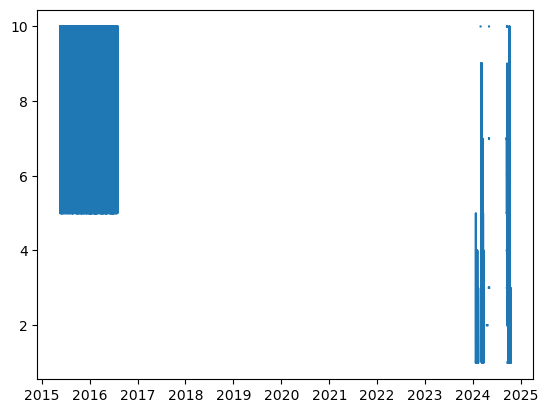

In [123]:
RainSm = Rain[Rain['Sta']==174].copy()
RainSm['Date_diff'] = RainSm['Date_diff']/pd.Timedelta('1 minutes')
RainSm['Ddf'] = RainSm['Date_diff'].apply(lambda x: x if x<=10 else np.nan)
RainSm['Dds'] =mode([
                              RainSm['Ddf'].shift(+5),
                              RainSm['Ddf'].shift(+4),
                              RainSm['Ddf'].shift(+3),
                              RainSm['Ddf'].shift(+2),
                              RainSm['Ddf'].shift(+1),
                              RainSm['Ddf'].shift(-1),
                              RainSm['Ddf'].shift(-2),
                              RainSm['Ddf'].shift(-3),
                              RainSm['Ddf'].shift(-4),
                              RainSm['Ddf'].shift(-5)])[0]
plt.step(RainSm['Date'],RainSm['Dds'])

 - La estación evidencia que entre los años 2015 y 2017 el periodo de observación cambió constantemente entre 5 y 10 minutos. 
 - Entre los años 2017 y 2023 la estación no registró observaciones.
 - En el año 2024 la estación empezó a registrar observaciones cada minuto, sin embargo sus observaciones presentan muchas discontinuidades.

 Ahora exploraremos una estación del conjunto de estaciones que presentan una frecuencia de periodo más frecuente de observación entre 50 y 90%.

 Elegimos la estación con índice 483, sus periodos de observación mas frecuentes son 1, 10 y 9 minutos. Elegiremos como umbral máximo 10 minutos.

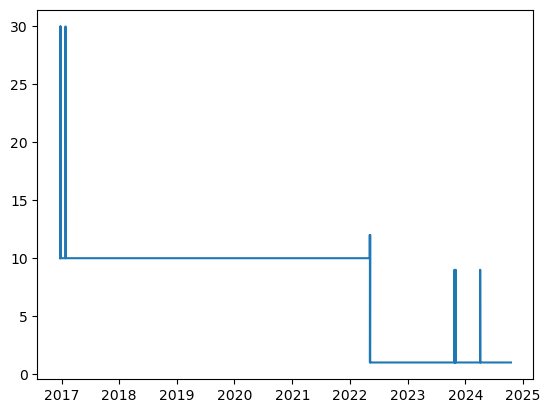

In [28]:
RainSm = Rain[Rain['Sta']==483].copy()
RainSm['Date_diff'] = RainSm['Date_diff']/pd.Timedelta('1 minutes')
RainSm['Ddf'] = RainSm['Date_diff'].apply(lambda x: x if x<=100 else np.nan)
RainSm['Dds'] =mode([
                              RainSm['Ddf'].shift(+5),
                              RainSm['Ddf'].shift(+4),
                              RainSm['Ddf'].shift(+3),
                              RainSm['Ddf'].shift(+2),
                              RainSm['Ddf'].shift(+1),
                              RainSm['Ddf'].shift(-1),
                              RainSm['Ddf'].shift(-2),
                              RainSm['Ddf'].shift(-3),
                              RainSm['Ddf'].shift(-4),
                              RainSm['Ddf'].shift(-5)])[0]
plt.step(RainSm['Date'],RainSm['Dds'])

Esta estación presenta un conjunto de dos periodos de tiempo notables en donde cada uno de los cuales presenta un periodo de observación diferente.

 - Entre 2016 y 2022 la estación capturó datos con un periodo de observación de 10 minutos
 - Después de 2022 la estación capturó datos con un periodo de observación de 1 minuto

Realizaremos la busqueda de nuevas funciones que nos permitan evitar el ruido ocasionado por pequeños periodos de inactividad de la estación y determinar de manera mas clara el periodo de observación empleado por la estación para realizar mediciones. 

Teniendo en cuenta que en un proceso previo fueron eliminados los registros duplicados y que existe solapamiento entre observaciones con periodos distintos, excluiremos del análisis todos aquellos registros en los cuales aparece el solapamiento de registros.

En las siguientes celdas probamos un nuevo conjunto de funciones de suavizado. En esta ocasión aumentamos la ventana sobre la cual calculamos la moda y adicionalmente usamos la desviación estandar como criterio para definir intervalos continuos de periodos consecutivos.

Realizamos primero la exploración de una estación del grupo de estaciones que presentan una frecuencia de periodo menor al 50%.

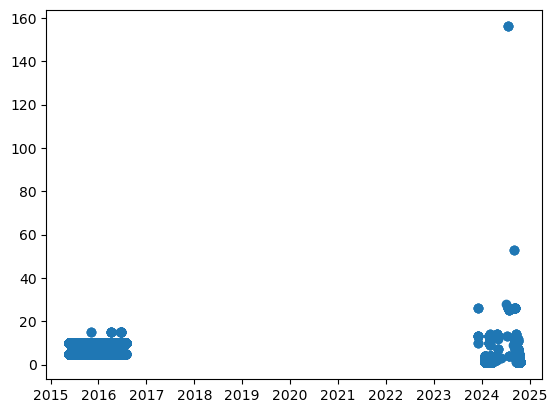

In [64]:
RainSm = Rain[Rain['Sta']==174].copy().reset_index(drop=True)    #36 174
RainSm['Date_diff'] = RainSm['Date_diff']/pd.Timedelta('1 minutes')
RainSm = RainSm.rename(columns={'Date_diff':'Ddf'})
RainSm['Dds'] = mode([
                              RainSm['Ddf'].shift(+9),
                              RainSm['Ddf'].shift(+8),
                              RainSm['Ddf'].shift(+7),
                              RainSm['Ddf'].shift(+6),
                              RainSm['Ddf'].shift(+5),
                              RainSm['Ddf'].shift(+4),
                              RainSm['Ddf'].shift(+3),
                              RainSm['Ddf'].shift(+2),
                              RainSm['Ddf'].shift(+1),
                              RainSm['Ddf'],
                              RainSm['Ddf'].shift(-1),
                              RainSm['Ddf'].shift(-2),
                              RainSm['Ddf'].shift(-3),
                              RainSm['Ddf'].shift(-4),
                              RainSm['Ddf'].shift(-5),
                              RainSm['Ddf'].shift(-6),
                              RainSm['Ddf'].shift(-7),
                              RainSm['Ddf'].shift(-8),
                              RainSm['Ddf'].shift(-9)])[0]
RainSm['Dds_std'] = tstd([
                            RainSm['Dds'].shift(+5),
                            RainSm['Dds'].shift(+4),
                            RainSm['Dds'].shift(+3),
                            RainSm['Dds'].shift(+2),
                            RainSm['Dds'].shift(+1),
                            RainSm['Dds'],
                            RainSm['Dds'].shift(-1),
                            RainSm['Dds'].shift(-2),
                            RainSm['Dds'].shift(-3),
                            RainSm['Dds'].shift(-4),
                            RainSm['Dds'].shift(-5)
                            ], nan_policy='omit')
RainSm['Cont'] = (RainSm['Dds_std']==0)*RainSm['Dds']
RainSm['Cont'] = RainSm['Cont'].apply(lambda x: np.nan if x==0 else x)
plt.scatter(RainSm['Date'].values,RainSm['Cont'].values)

Observamos que los periodos no son homogeneos en los registros.

Realizaremos la exploración sobre una estación del grupo de estaciones que presentan una frecuencia de periodo mas común entre 50% y 90%.

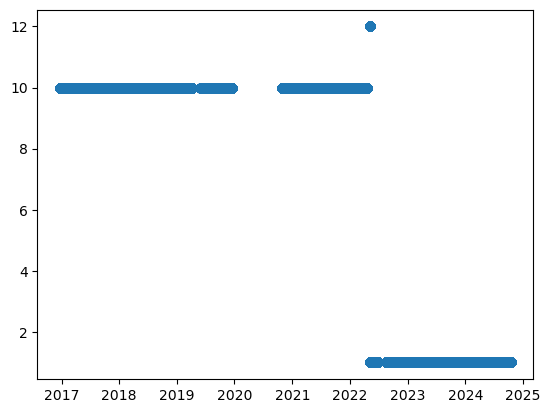

In [65]:
RainSm = Rain[Rain['Sta']==483].copy().reset_index(drop=True)    #36 174
RainSm['Date_diff'] = RainSm['Date_diff']/pd.Timedelta('1 minutes')
RainSm = RainSm.rename(columns={'Date_diff':'Ddf'})
RainSm['Dds'] = mode([
                              RainSm['Ddf'].shift(+9),
                              RainSm['Ddf'].shift(+8),
                              RainSm['Ddf'].shift(+7),
                              RainSm['Ddf'].shift(+6),
                              RainSm['Ddf'].shift(+5),
                              RainSm['Ddf'].shift(+4),
                              RainSm['Ddf'].shift(+3),
                              RainSm['Ddf'].shift(+2),
                              RainSm['Ddf'].shift(+1),
                              RainSm['Ddf'],
                              RainSm['Ddf'].shift(-1),
                              RainSm['Ddf'].shift(-2),
                              RainSm['Ddf'].shift(-3),
                              RainSm['Ddf'].shift(-4),
                              RainSm['Ddf'].shift(-5),
                              RainSm['Ddf'].shift(-6),
                              RainSm['Ddf'].shift(-7),
                              RainSm['Ddf'].shift(-8),
                              RainSm['Ddf'].shift(-9)])[0]
RainSm['Dds_std'] = tstd([
                            RainSm['Dds'].shift(+5),
                            RainSm['Dds'].shift(+4),
                            RainSm['Dds'].shift(+3),
                            RainSm['Dds'].shift(+2),
                            RainSm['Dds'].shift(+1),
                            RainSm['Dds'],
                            RainSm['Dds'].shift(-1),
                            RainSm['Dds'].shift(-2),
                            RainSm['Dds'].shift(-3),
                            RainSm['Dds'].shift(-4),
                            RainSm['Dds'].shift(-5)
                            ], nan_policy='omit')
RainSm['Cont'] = (RainSm['Dds_std']==0)*RainSm['Dds']
RainSm['Cont'] = RainSm['Cont'].apply(lambda x: np.nan if x==0 else x)
plt.scatter(RainSm['Date'].values,RainSm['Cont'].values)

Observamos claramente dos grupos significativos de periodos en las observaciones.

Realizaremos la exploración sobre una estación del grupo de estaciones que presentan una frecuencia de periodo mas común mayor al 90%.

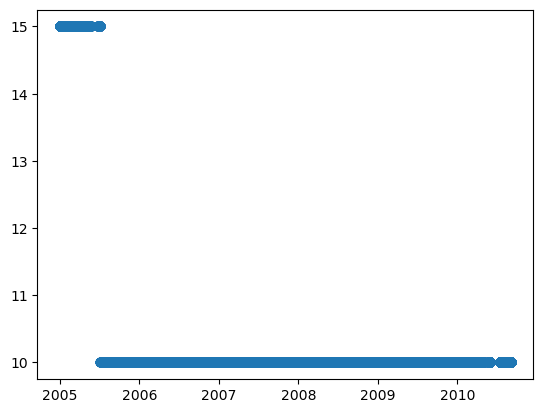

In [ ]:
RainSm = Rain[Rain['Sta']==36].copy().reset_index(drop=True)    #36 174
RainSm['Date_diff'] = RainSm['Date_diff']/pd.Timedelta('1 minutes')
RainSm = RainSm.rename(columns={'Date_diff':'Ddf'})
RainSm['Dds'] = mode([
                              RainSm['Ddf'].shift(+9),
                              RainSm['Ddf'].shift(+8),
                              RainSm['Ddf'].shift(+7),
                              RainSm['Ddf'].shift(+6),
                              RainSm['Ddf'].shift(+5),
                              RainSm['Ddf'].shift(+4),
                              RainSm['Ddf'].shift(+3),
                              RainSm['Ddf'].shift(+2),
                              RainSm['Ddf'].shift(+1),
                              RainSm['Ddf'],
                              RainSm['Ddf'].shift(-1),
                              RainSm['Ddf'].shift(-2),
                              RainSm['Ddf'].shift(-3),
                              RainSm['Ddf'].shift(-4),
                              RainSm['Ddf'].shift(-5),
                              RainSm['Ddf'].shift(-6),
                              RainSm['Ddf'].shift(-7),
                              RainSm['Ddf'].shift(-8),
                              RainSm['Ddf'].shift(-9)])[0]
RainSm['Dds_std'] = tstd([
                            RainSm['Dds'].shift(+5),
                            RainSm['Dds'].shift(+4),
                            RainSm['Dds'].shift(+3),
                            RainSm['Dds'].shift(+2),
                            RainSm['Dds'].shift(+1),
                            RainSm['Dds'],
                            RainSm['Dds'].shift(-1),
                            RainSm['Dds'].shift(-2),
                            RainSm['Dds'].shift(-3),
                            RainSm['Dds'].shift(-4),
                            RainSm['Dds'].shift(-5)
                            ], nan_policy='omit')
RainSm['Cont'] = (RainSm['Dds_std']==0)*RainSm['Dds']
RainSm['Cont'] = RainSm['Cont'].apply(lambda x: np.nan if x==0 else x)
plt.scatter(RainSm['Date'].values,RainSm['Cont'].values)

Observamos claramente dos grupos significativos de periodos en las observaciones.

Si bien el método de suavizado que combina la aplicación de la moda y la dispersión estandar de los periodos de observación resulta eficiente para encontrar el periodo de observación en grandes fragmentos de tiempo, realizaremos una optimización del código usando arreglos de numpy con el objetivo de reducir el tiempo de ejecución.

En la siguiente celda mostramos una forma alternativa y mas eficiente de encontrar estos periodos de tiempo. Realizamos la exploración a una estación de cada grupo descrito anteriormente.

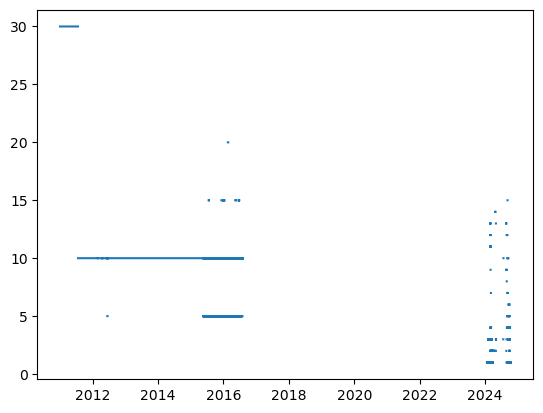

In [ ]:
RainSm1 = Rain[Rain['Sta'] == 208].copy().reset_index(drop=True)
RainSm1['Date_diff'] = RainSm1['Date_diff'] / pd.Timedelta('1 minutes')

Ddf_array = RainSm1['Date_diff'].to_numpy()
Dds_values = mode(
    np.array([np.roll(Ddf_array, shift) for shift in range(-5, 5)]),
    axis=0,
    nan_policy='omit'
)[0]
Dds_std_values = tstd(
    np.array([np.roll(Dds_values, shift) for shift in range(-5, 5)]),
    axis=0,
    nan_policy='omit'
)
RainSm1['Dds'] = Dds_values
RainSm1['Dds_std'] = Dds_std_values
RainSm1['Cont'] = np.where(RainSm1['Dds_std'] == 0, RainSm1['Dds'], np.nan)

plt.step(RainSm1['Date'].values, RainSm1['Cont'].values)

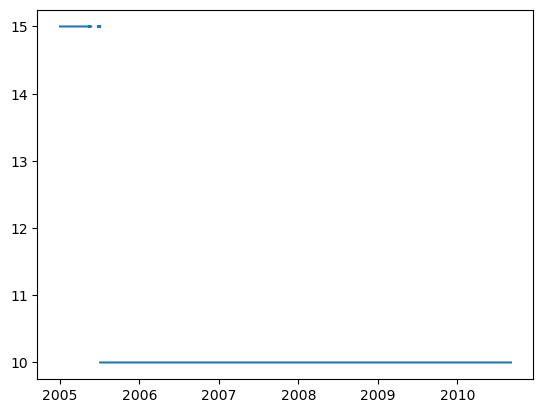

In [54]:
RainSm1 = Rain[Rain['Sta'] == 36].copy().reset_index(drop=True)
RainSm1['Date_diff'] = RainSm1['Date_diff'] / pd.Timedelta('1 minutes')

Ddf_array = RainSm1['Date_diff'].to_numpy()

Dds_values = mode(
    np.array([np.roll(Ddf_array, shift) for shift in range(-5, 5)]),
    axis=0#,
    #nan_policy='omit'
)[0]

Dds_std_values = tstd(
    np.array([np.roll(Dds_values, shift) for shift in range(-5, 5)]),
    axis=0,
    nan_policy='omit'
)

RainSm1['Dds'] = Dds_values
RainSm1['Dds_std'] = Dds_std_values
RainSm1['Cont'] = np.where(RainSm1['Dds_std'] == 0, RainSm1['Dds'], np.nan)

plt.step(RainSm1['Date'].values, RainSm1['Cont'].values)


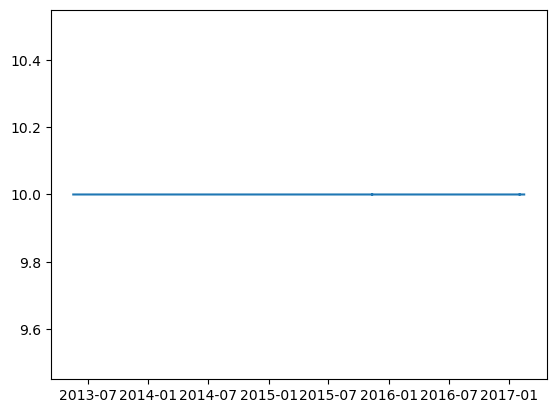

In [49]:
RainSm1 = Rain[Rain['Sta'] == 185].copy().reset_index(drop=True)
RainSm1['Date_diff'] = RainSm1['Date_diff'] / pd.Timedelta('1 minutes')

Ddf_array = RainSm1['Date_diff'].to_numpy()

Dds_values = mode(
    np.array([np.roll(Ddf_array, shift) for shift in range(-5, 5)]),
    axis=0#,
    #nan_policy='omit'
)[0]

Dds_std_values = tstd(
    np.array([np.roll(Dds_values, shift) for shift in range(-5, 5)]),
    axis=0,
    nan_policy='omit'
)

RainSm1['Dds'] = Dds_values
RainSm1['Dds_std'] = Dds_std_values
RainSm1['Cont'] = np.where(RainSm1['Dds_std'] == 0, RainSm1['Dds'], np.nan)

plt.plot(RainSm1['Date'].values, RainSm1['Cont'].values)

###### Suavizado y agrupación de periodos de observación.

**Suavizado y agrupación de periodos de observación.**

En la siguiente celda recopilamos el código necesaria para limpiar la seria temporal y realizamos una prueba sobre una estación.

In [331]:
RainSm = Rain[Rain['Sta'] == 711].copy().reset_index(drop=True)                                                         #Extracción de los registros de 1 estación
RainSm['Date_diff'] = RainSm['Date_diff'] / pd.Timedelta('1 minutes')                                                   #Conversión de la diferencia de tiempos a minutos

# Obtención de los periodos de muestreo de los registros usando numpy
Ddf_array = RainSm['Date_diff'].to_numpy()                                                                              #Conversión de la columa de diferencia de tiempos a numpy                                                            
Dds_values = mode(np.array([np.roll(Ddf_array, shift) for shift in range(-5, 5)]), axis=0)[0]                           #Estimación de la moda de la diferencia de tiempos en una ventana de 11 registros
Dds_std_values = tstd(np.array([np.roll(Dds_values, shift) for shift in range(-10, 10)]), axis=0, nan_policy='omit')    #Estimación de la desviación estandar de la columna que calcula la moda
RainSm['Dds'] = Dds_values                                                                                              #Inserción de la columna con el valor de la moda en el dataframe 
RainSm['Dds_std'] = Dds_std_values                                                                                      #Inserción de la columna con el valor de la desviación estandar en el dataframe 
RainSm['Cont'] = np.where(RainSm['Dds_std'] == 0, RainSm['Dds'], np.nan)                                                #Criterio de continuidad que elimina registros sucesivos donde existe solapamiento de registros
RainSm['CrMD'] = (RainSm['Date'].dt.hour *60 + RainSm['Date'].dt.minute)%RainSm['Cont']                                 #Criterio de continuidad, conversión de la hora a minutos
RainSm['CrMD'] = np.where(RainSm['CrMD'] == 0, RainSm['Cont'], np.nan)                                                  #Criterio de continuidad que elimina registros sucesivos donde existe solapamiento de registros
RainSm = RainSm.dropna()

# Obtención del tiempo inicial de muestreo y eliminación de registros con solapamiento de registros
RainSm['Date_0'] = RainSm['Date'] - pd.to_timedelta(RainSm['Cont'], unit='m')                                           #Obtención del tiempo inicial de muestreo
RainSm['Diff'] = (RainSm['Date_0'] - RainSm['Date'].shift(1))/ pd.Timedelta('1 minutes')                                #Obtiene la diferencia entre el tiempo final de una observación y el tiempo inicial de la siguiente
RainSm['Diff'] = np.where(RainSm['Diff'] >= 0, RainSm['Diff'], np.nan)                                                  #Criterio que permite eliminar periodos de observación solapados
RainSm['Gaps'] = RainSm['Diff']/RainSm['Cont']                                                                          #Determinación de la cantidad de intervalos dentro de una discontinuidad
RainSm['Gaps'] = np.where(np.mod(RainSm['Gaps'],1)==0, RainSm['Gaps'], np.nan)                                          #Criterio que permite descartar intervalos no enteros

RainSm = RainSm[['Sta','Date_0','Date','Rain','Cont','Gaps']]

# Rellenado de registros 
RainSm['Gaps<3'] = RainSm.apply(lambda x: True if (x['Gaps']<=3)&(x['Gaps']>0) else False, axis=1)                      #Criterio que permite encontrar hasta 3 datos consecutivos faltantes
RainSm['Near'] = (RainSm['Gaps<3']==True)|(RainSm['Gaps<3'].shift(-1)==True)                                            #Determina los rangos que permiten realizar la inferencia de los datos faltantes
RainSm = RainSm.dropna()    
Rain_aux = RainSm.loc[RainSm.index.repeat(RainSm['Gaps']+1)].reset_index(drop=True)                                     #Inserción de filas faltantes
Rain_aux['oldInd'] = np.repeat(RainSm.index, RainSm['Gaps']+1)                                                          #Almacena el índice original, el cual permitirá diferenciar registros nuevos y originales
Rain_aux['old'] = Rain_aux.groupby('oldInd').cumcount() == Rain_aux['Gaps']                                             #Criterio que señala una región sobre la cual se realizará la inferencia de datos nuevos
Rain_aux['Rain'] = np.where(Rain_aux['old'], Rain_aux['Rain'], np.nan)                                                  #Los registros nuevos se marcan como nan
Rain_aux.loc[Rain_aux['old']==False,['Date_0','Date']] = pd.NaT                                                         #Las fechas nuevas se marcan como nat

Rain_aux.loc[(Rain_aux['Near']==True)&(Rain_aux['Gaps<3']==True),'Rain'] = Rain_aux['Rain'].interpolate(method='linear').round(0)   #Inferencia del valor de precipitación
Rain_aux['Date_0'] = Rain_aux['Date_0'].interpolate(method='linear')                                                                #Inferencia de la fecha inicial
Rain_aux['Date'] = Rain_aux['Date'].interpolate(method='linear')                                                                    #Inferencia de la fecha inicial

#Agrupamiento en periodos de tiempo de 30 minutos
Rain_aux0 = Rain_aux.set_index('Date_0').copy()
rain_30min = Rain_aux0['Rain'].resample('30min').apply(lambda x: np.nan if x.isna().any() else x.sum())
rain_30min = rain_30min.reset_index()

#Alistamiento del dataframe final
rain_30min['Date_0'] = rain_30min['Date_0'] + pd.Timedelta('30 minutes')
rain_30min = rain_30min.rename(columns={'Date_0':'Date'})
rain_30min['Sta'] = RainSm['Sta'].unique()[0]
rain_30min.to_parquet(f'../Rain/{RainSm['Sta'].unique()[0]}.parquet')

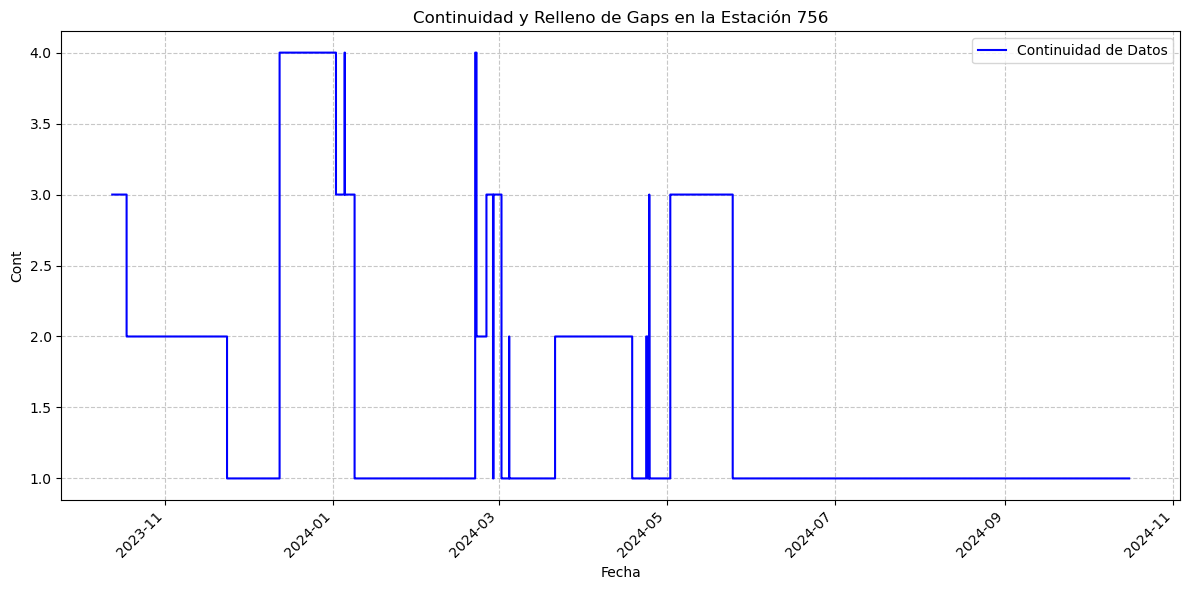

In [317]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.step(Rain_aux['Date_0'], Rain_aux['Cont'].values, where='post', color='blue', linewidth=1.5)
plt.title(f'Continuidad y Relleno de Gaps en la Estación {RainSm['Sta'].unique()[0]}')
plt.xlabel('Fecha')
plt.ylabel('Cont')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['Continuidad de Datos'], loc='best')
plt.tight_layout()
plt.savefig(f'../Rain/{RainSm['Sta'].unique()[0]}.jpg')


En la siguiente celda recorremos los registros de las estaciones con frecuencia de periodo mas frecuente entre 50 y 90%

In [19]:
StaBetFreq5090 = StaPeriod_FreqRec[(StaPeriod_FreqRec['%']>=0.5)&(StaPeriod_FreqRec['%']<0.9)]['Sta']
StaBetFreq5090 = StaBetFreq5090[StaBetFreq5090>616]

In [23]:
for i in StaBetFreq5090:
        RainSm = Rain[Rain['Sta'] == i].copy().reset_index(drop=True)                                                         #Extracción de los registros de 1 estación
        sta = RainSm.Sta.values[0]
        RainSm['Date_diff'] = RainSm['Date_diff'] / pd.Timedelta('1 minutes')                                                   #Conversión de la diferencia de tiempos a minutos

        # Obtención de los periodos de muestreo de los registros usando numpy
        Ddf_array = RainSm['Date_diff'].to_numpy()                                                                              #Conversión de la columa de diferencia de tiempos a numpy                                                            
        Dds_values = mode(np.array([np.roll(Ddf_array, shift) for shift in range(-5, 5)]), axis=0)[0]                           #Estimación de la moda de la diferencia de tiempos en una ventana de 11 registros
        Dds_std_values = tstd(np.array([np.roll(Dds_values, shift) for shift in range(-10, 10)]), axis=0, nan_policy='omit')    #Estimación de la desviación estandar de la columna que calcula la moda
        RainSm['Dds'] = Dds_values                                                                                              #Inserción de la columna con el valor de la moda en el dataframe 
        RainSm['Dds_std'] = Dds_std_values                                                                                      #Inserción de la columna con el valor de la desviación estandar en el dataframe 
        RainSm['Cont'] = np.where(RainSm['Dds_std'] == 0, RainSm['Dds'], np.nan)                                                #Criterio de continuidad que elimina registros sucesivos donde existe solapamiento de registros
        RainSm['CrMD'] = (RainSm['Date'].dt.hour *60 + RainSm['Date'].dt.minute)%RainSm['Cont']                                 #Criterio de continuidad, conversión de la hora a minutos
        RainSm['CrMD'] = np.where(RainSm['CrMD'] == 0, RainSm['Cont'], np.nan)                                                  #Criterio de continuidad que elimina registros sucesivos donde existe solapamiento de registros
        RainSm = RainSm.dropna()

        # Obtención del tiempo inicial de muestreo y eliminación de registros con solapamiento de registros
        RainSm['Date_0'] = RainSm['Date'] - pd.to_timedelta(RainSm['Cont'], unit='m')                                           #Obtención del tiempo inicial de muestreo
        RainSm['Diff'] = (RainSm['Date_0'] - RainSm['Date'].shift(1))/ pd.Timedelta('1 minutes')                                #Obtiene la diferencia entre el tiempo final de una observación y el tiempo inicial de la siguiente
        RainSm['Diff'] = np.where(RainSm['Diff'] >= 0, RainSm['Diff'], np.nan)                                                  #Criterio que permite eliminar periodos de observación solapados
        RainSm['Gaps'] = RainSm['Diff']/RainSm['Cont']                                                                          #Determinación de la cantidad de intervalos dentro de una discontinuidad
        RainSm['Gaps'] = np.where(np.mod(RainSm['Gaps'],1)==0, RainSm['Gaps'], np.nan)                                          #Criterio que permite descartar intervalos no enteros

        RainSm = RainSm[['Sta','Date_0','Date','Rain','Cont','Gaps']]

        # Rellenado de registros 
        RainSm['Gaps<3'] = RainSm.apply(lambda x: True if (x['Gaps']<=3)&(x['Gaps']>0) else False, axis=1)                      #Criterio que permite encontrar hasta 3 datos consecutivos faltantes
        RainSm['Near'] = (RainSm['Gaps<3']==True)|(RainSm['Gaps<3'].shift(-1)==True)                                            #Determina los rangos que permiten realizar la inferencia de los datos faltantes
        RainSm = RainSm.dropna()    
        Rain_aux = RainSm.loc[RainSm.index.repeat(RainSm['Gaps']+1)].reset_index(drop=True)                                     #Inserción de filas faltantes
        Rain_aux['oldInd'] = np.repeat(RainSm.index, RainSm['Gaps']+1)                                                          #Almacena el índice original, el cual permitirá diferenciar registros nuevos y originales
        Rain_aux['old'] = Rain_aux.groupby('oldInd').cumcount() == Rain_aux['Gaps']                                             #Criterio que señala una región sobre la cual se realizará la inferencia de datos nuevos
        Rain_aux['Rain'] = np.where(Rain_aux['old'], Rain_aux['Rain'], np.nan)                                                  #Los registros nuevos se marcan como nan
        Rain_aux.loc[Rain_aux['old']==False,['Date_0','Date']] = pd.NaT                                                         #Las fechas nuevas se marcan como nat

        Rain_aux.loc[(Rain_aux['Near']==True)&(Rain_aux['Gaps<3']==True),'Rain'] = Rain_aux['Rain'].interpolate(method='linear').round(0)   #Inferencia del valor de precipitación
        Rain_aux['Date_0'] = Rain_aux['Date_0'].interpolate(method='linear')                                                                #Inferencia de la fecha inicial
        Rain_aux['Date'] = Rain_aux['Date'].interpolate(method='linear')                                                                    #Inferencia de la fecha inicial

        #Agrupamiento en periodos de tiempo de 30 minutos
        Rain_aux0 = Rain_aux.set_index('Date_0').copy()
        rain_30min = Rain_aux0['Rain'].resample('30min').apply(lambda x: np.nan if x.isna().any() else x.sum())
        rain_30min = rain_30min.reset_index()

        #Alistamiento del dataframe final
        rain_30min['Date_0'] = rain_30min['Date_0'] + pd.Timedelta('30 minutes')
        rain_30min = rain_30min.rename(columns={'Date_0':'Date'})
        rain_30min['Sta'] = sta
        rain_30min.to_parquet(f'../Rain/{sta}.parquet')

        #Gráfica de continuidad de los registros
        plt.figure(figsize=(12, 6))
        plt.step(Rain_aux['Date_0'], Rain_aux['Cont'].values, where='post', color='blue', linewidth=1.5)
        plt.title(f'Continuidad y Relleno de Gaps en la Estación {sta}')
        plt.xlabel('Fecha')
        plt.ylabel('Cont')
        plt.ylim(bottom=0)
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(['Continuidad de Datos'], loc='best')
        plt.tight_layout()
        plt.savefig(f'../Rain/{sta}.jpg')
        plt.close('all')

En la siguiente celda recorremos los registros de las estaciones con frecuencia de periodo mas frecuente mayor al 90%

In [5]:
StaGrFreq90 = StaPeriod_FreqRec[StaPeriod_FreqRec['%']>=0.9]['Sta']
StaGrFreq90 = StaGrFreq90[StaGrFreq90>750]

In [6]:
for i in StaGrFreq90:
        RainSm = Rain[Rain['Sta'] == i].copy().reset_index(drop=True)                                                         #Extracción de los registros de 1 estación
        sta = RainSm.Sta.values[0]
        RainSm['Date_diff'] = RainSm['Date_diff'] / pd.Timedelta('1 minutes')                                                   #Conversión de la diferencia de tiempos a minutos

        # Obtención de los periodos de muestreo de los registros usando numpy
        Ddf_array = RainSm['Date_diff'].to_numpy()                                                                              #Conversión de la columa de diferencia de tiempos a numpy                                                            
        Dds_values = mode(np.array([np.roll(Ddf_array, shift) for shift in range(-5, 5)]), axis=0)[0]                           #Estimación de la moda de la diferencia de tiempos en una ventana de 11 registros
        Dds_std_values = tstd(np.array([np.roll(Dds_values, shift) for shift in range(-10, 10)]), axis=0, nan_policy='omit')    #Estimación de la desviación estandar de la columna que calcula la moda
        RainSm['Dds'] = Dds_values                                                                                              #Inserción de la columna con el valor de la moda en el dataframe 
        RainSm['Dds_std'] = Dds_std_values                                                                                      #Inserción de la columna con el valor de la desviación estandar en el dataframe 
        RainSm['Cont'] = np.where(RainSm['Dds_std'] == 0, RainSm['Dds'], np.nan)                                                #Criterio de continuidad que elimina registros sucesivos donde existe solapamiento de registros
        RainSm['CrMD'] = (RainSm['Date'].dt.hour *60 + RainSm['Date'].dt.minute)%RainSm['Cont']                                 #Criterio de continuidad, conversión de la hora a minutos
        RainSm['CrMD'] = np.where(RainSm['CrMD'] == 0, RainSm['Cont'], np.nan)                                                  #Criterio de continuidad que elimina registros sucesivos donde existe solapamiento de registros
        RainSm = RainSm.dropna()

        # Obtención del tiempo inicial de muestreo y eliminación de registros con solapamiento de registros
        RainSm['Date_0'] = RainSm['Date'] - pd.to_timedelta(RainSm['Cont'], unit='m')                                           #Obtención del tiempo inicial de muestreo
        RainSm['Diff'] = (RainSm['Date_0'] - RainSm['Date'].shift(1))/ pd.Timedelta('1 minutes')                                #Obtiene la diferencia entre el tiempo final de una observación y el tiempo inicial de la siguiente
        RainSm['Diff'] = np.where(RainSm['Diff'] >= 0, RainSm['Diff'], np.nan)                                                  #Criterio que permite eliminar periodos de observación solapados
        RainSm['Gaps'] = RainSm['Diff']/RainSm['Cont']                                                                          #Determinación de la cantidad de intervalos dentro de una discontinuidad
        RainSm['Gaps'] = np.where(np.mod(RainSm['Gaps'],1)==0, RainSm['Gaps'], np.nan)                                          #Criterio que permite descartar intervalos no enteros

        RainSm = RainSm[['Sta','Date_0','Date','Rain','Cont','Gaps']]

        # Rellenado de registros 
        RainSm['Gaps<3'] = RainSm.apply(lambda x: True if (x['Gaps']<=3)&(x['Gaps']>0) else False, axis=1)                      #Criterio que permite encontrar hasta 3 datos consecutivos faltantes
        RainSm['Near'] = (RainSm['Gaps<3']==True)|(RainSm['Gaps<3'].shift(-1)==True)                                            #Determina los rangos que permiten realizar la inferencia de los datos faltantes
        RainSm = RainSm.dropna()    
        Rain_aux = RainSm.loc[RainSm.index.repeat(RainSm['Gaps']+1)].reset_index(drop=True)                                     #Inserción de filas faltantes
        Rain_aux['oldInd'] = np.repeat(RainSm.index, RainSm['Gaps']+1)                                                          #Almacena el índice original, el cual permitirá diferenciar registros nuevos y originales
        Rain_aux['old'] = Rain_aux.groupby('oldInd').cumcount() == Rain_aux['Gaps']                                             #Criterio que señala una región sobre la cual se realizará la inferencia de datos nuevos
        Rain_aux['Rain'] = np.where(Rain_aux['old'], Rain_aux['Rain'], np.nan)                                                  #Los registros nuevos se marcan como nan
        Rain_aux.loc[Rain_aux['old']==False,['Date_0','Date']] = pd.NaT                                                         #Las fechas nuevas se marcan como nat

        Rain_aux.loc[(Rain_aux['Near']==True)&(Rain_aux['Gaps<3']==True),'Rain'] = Rain_aux['Rain'].interpolate(method='linear').round(0)   #Inferencia del valor de precipitación
        Rain_aux['Date_0'] = Rain_aux['Date_0'].interpolate(method='linear')                                                                #Inferencia de la fecha inicial
        Rain_aux['Date'] = Rain_aux['Date'].interpolate(method='linear')                                                                    #Inferencia de la fecha inicial

        #Agrupamiento en periodos de tiempo de 30 minutos
        Rain_aux0 = Rain_aux.set_index('Date_0').copy()
        rain_30min = Rain_aux0['Rain'].resample('30min').apply(lambda x: np.nan if x.isna().any() else x.sum())
        rain_30min = rain_30min.reset_index()

        #Alistamiento del dataframe final
        rain_30min['Date_0'] = rain_30min['Date_0'] + pd.Timedelta('30 minutes')
        rain_30min = rain_30min.rename(columns={'Date_0':'Date'})
        rain_30min['Sta'] = sta
        rain_30min.to_parquet(f'../Rain90/{sta}.parquet')

        #Gráfica de continuidad de los registros
        plt.figure(figsize=(12, 6))
        plt.step(Rain_aux['Date_0'], Rain_aux['Cont'].values, where='post', color='blue', linewidth=1.5)
        plt.title(f'Continuidad y Relleno de Gaps en la Estación {sta}')
        plt.xlabel('Fecha')
        plt.ylabel('Cont')
        plt.ylim(bottom=0)
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(['Continuidad de Datos'], loc='best')
        plt.tight_layout()
        plt.savefig(f'../Rain90/{sta}.jpg')
        plt.close('all')